# Polymer Electrolyte Data Mining Project:

## Step 3: Statistical learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split

# Set a random seed to ensure reproducibility across runs
SEED = 1
np.random.seed(seed=SEED)

In [2]:
font = {'size'   : 14}

mpl.rc('font', **font)

### Importing .CSV that's cleaned for statistical learning

Load the cleaned dataset with all the dropped columns and one-hot encoding

In [3]:
# Import data from master excel file
file_name = 'Cleaned_Final_Data-forML_6_2_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\_' 
file = file_path + file_name
data_ML = pd.read_csv(file)
data_ML.head()

,Polymer family,Polymer,Comonomer percentage,Anion,crystalline?,drying temp,drying time (h),drying vacuum,Comonomer1 apol,Comonomer1 bpol,...,anion ETA_dPsi_B,anion Kier1,anion Kier2,solvent BP,approxTg,approxMW(kDa),logCond60,log Li:functional group,chain architecture_branched,chain architecture_linear
0,"carbonate, ether",polyethylene carbonate,95.2,TFSI,0,60,24.0,2,11.416758,10.359242,...,0.0,15.0,3.785600,82.0,-3.0,37.0,-5.72,-1.125997,0,1
1,"carbonate, ether",polyethylene carbonate,95.2,TFSI,0,60,24.0,2,11.416758,10.359242,...,0.0,15.0,3.785600,82.0,-20.0,37.0,-5.19,-0.700029,0,1
2,"carbonate, ether",polyethylene carbonate,95.2,TFSI,0,60,24.0,2,11.416758,10.359242,...,0.0,15.0,3.785600,82.0,-33.0,37.0,-4.81,-0.347846,0,1
3,"carbonate, ether",polyethylene carbonate,95.2,TFSI,0,60,24.0,2,11.416758,10.359242,...,0.0,15.0,3.785600,82.0,-62.0,37.0,-4.25,0.078123,0,1
4,"carbonate, ether",polyethylene carbonate,95.2,N(SO2C2F5)2,0,60,24.0,2,11.416758,10.359242,...,0.0,21.0,5.273923,82.0,-14.0,37.0,-5.56,-1.255939,0,1


In [4]:
data_ML.columns[0:100]

Index(['Polymer family', 'Polymer', 'Comonomer percentage', 'Anion',
       'crystalline?', 'drying temp', 'drying time (h)', 'drying vacuum',
       'Comonomer1 apol', 'Comonomer1 bpol', 'Comonomer1 nHBAcc',
       'Comonomer1 nHBDon', 'Comonomer1 nRot', 'Comonomer1 RotRatio',
       'Comonomer1 Vabc', 'Comonomer1 MW', 'Comonomer1 nAcid',
       'Comonomer1 nBase', 'Comonomer1 nAtom', 'Comonomer1 nHeavyAtom',
       'Comonomer1 nSpiro', 'Comonomer1 nBridgehead', 'Comonomer1 nHetero',
       'Comonomer1 nH', 'Comonomer1 nB', 'Comonomer1 nC', 'Comonomer1 nN',
       'Comonomer1 nO', 'Comonomer1 nS', 'Comonomer1 nP', 'Comonomer1 nF',
       'Comonomer1 nCl', 'Comonomer1 nBr', 'Comonomer1 nI', 'Comonomer1 nX',
       'Comonomer1 ETA_alpha', 'Comonomer1 AETA_alpha',
       'Comonomer1 ETA_shape_p', 'Comonomer1 ETA_shape_y',
       'Comonomer1 ETA_shape_x', 'Comonomer1 ETA_beta', 'Comonomer1 AETA_beta',
       'Comonomer1 ETA_beta_s', 'Comonomer1 AETA_beta_s',
       'Comonomer1 ETA_beta_ns

In [5]:
data_ML.columns[100:200]

Index(['Comonomer2 nN', 'Comonomer2 nO', 'Comonomer2 nS', 'Comonomer2 nP',
       'Comonomer2 nF', 'Comonomer2 nCl', 'Comonomer2 nBr', 'Comonomer2 nI',
       'Comonomer2 nX', 'Comonomer2 ETA_alpha', 'Comonomer2 AETA_alpha',
       'Comonomer2 ETA_shape_p', 'Comonomer2 ETA_shape_y',
       'Comonomer2 ETA_shape_x', 'Comonomer2 ETA_beta', 'Comonomer2 AETA_beta',
       'Comonomer2 ETA_beta_s', 'Comonomer2 AETA_beta_s',
       'Comonomer2 ETA_beta_ns', 'Comonomer2 AETA_beta_ns',
       'Comonomer2 ETA_beta_ns_d', 'Comonomer2 AETA_beta_ns_d',
       'Comonomer2 ETA_eta', 'Comonomer2 AETA_eta', 'Comonomer2 ETA_eta_L',
       'Comonomer2 AETA_eta_L', 'Comonomer2 ETA_eta_R',
       'Comonomer2 AETA_eta_R', 'Comonomer2 ETA_eta_RL',
       'Comonomer2 AETA_eta_RL', 'Comonomer2 ETA_eta_F',
       'Comonomer2 AETA_eta_F', 'Comonomer2 ETA_eta_FL',
       'Comonomer2 AETA_eta_FL', 'Comonomer2 ETA_eta_B',
       'Comonomer2 AETA_eta_B', 'Comonomer2 ETA_eta_BR',
       'Comonomer2 AETA_eta_BR', 'Com

In [6]:
data_ML.columns[200:]

Index(['anion ETA_eta_R', 'anion AETA_eta_R', 'anion ETA_eta_RL',
       'anion AETA_eta_RL', 'anion ETA_eta_F', 'anion AETA_eta_F',
       'anion ETA_eta_FL', 'anion AETA_eta_FL', 'anion ETA_eta_B',
       'anion AETA_eta_B', 'anion ETA_eta_BR', 'anion AETA_eta_BR',
       'anion ETA_dAlpha_A', 'anion ETA_dAlpha_B', 'anion ETA_epsilon_1',
       'anion ETA_epsilon_2', 'anion ETA_epsilon_3', 'anion ETA_epsilon_4',
       'anion ETA_epsilon_5', 'anion ETA_dEpsilon_A', 'anion ETA_dEpsilon_B',
       'anion ETA_dEpsilon_C', 'anion ETA_dEpsilon_D', 'anion ETA_dBeta',
       'anion AETA_dBeta', 'anion ETA_psi_1', 'anion ETA_dPsi_A',
       'anion ETA_dPsi_B', 'anion Kier1', 'anion Kier2', 'solvent BP',
       'approxTg', 'approxMW(kDa)', 'logCond60', 'log Li:functional group',
       'chain architecture_branched', 'chain architecture_linear'],
      dtype='object')

Drop additional columns that were used for visualization but will not be used for statistical learning.

In [7]:
dropCol = ['Polymer family', 'Polymer','Anion',] 

data_ML_sparse = data_ML.drop(columns = dropCol)

In [8]:
print(f'Full DataFrame shape: {data_ML.shape}')
print(f'Sparse DataFrame shape: {data_ML_sparse.shape}')

Full DataFrame shape: (271, 237)
Sparse DataFrame shape: (271, 234)


### Drop additonal highly-correlated features

In [9]:
corr_matrix = data_ML_sparse.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

data_ML_corr = data_ML_sparse.drop(data_ML_sparse[to_drop], axis=1)

data_ML_corr

,Comonomer percentage,crystalline?,drying temp,drying time (h),drying vacuum,Comonomer1 apol,Comonomer1 bpol,Comonomer1 nHBAcc,Comonomer1 nHBDon,Comonomer1 nRot,...,anion ETA_dBeta,anion AETA_dBeta,anion ETA_psi_1,anion ETA_dPsi_B,solvent BP,approxTg,approxMW(kDa),logCond60,log Li:functional group,chain architecture_branched
0,95.20,0,60,24.0,2,11.416758,10.359242,3,0,0,...,-3.5,-0.233333,0.288604,0.0,82.0,-3.0,37.0,-5.720000,-1.125997,0
1,95.20,0,60,24.0,2,11.416758,10.359242,3,0,0,...,-3.5,-0.233333,0.288604,0.0,82.0,-20.0,37.0,-5.190000,-0.700029,0
2,95.20,0,60,24.0,2,11.416758,10.359242,3,0,0,...,-3.5,-0.233333,0.288604,0.0,82.0,-33.0,37.0,-4.810000,-0.347846,0
3,95.20,0,60,24.0,2,11.416758,10.359242,3,0,0,...,-3.5,-0.233333,0.288604,0.0,82.0,-62.0,37.0,-4.250000,0.078123,0
4,95.20,0,60,24.0,2,11.416758,10.359242,3,0,0,...,-7.5,-0.357143,0.276687,0.0,82.0,-14.0,37.0,-5.560000,-1.255939,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,50.00,0,60,24.0,2,23.962688,19.523312,2,0,6,...,-3.5,-0.233333,0.288604,0.0,61.2,-20.0,190.0,-5.836820,-1.301030,1
267,50.00,0,60,24.0,2,21.761102,19.252898,3,0,6,...,-3.5,-0.233333,0.288604,0.0,61.2,-55.0,17.0,-4.528742,-1.477121,1
268,78.30,0,65,6.0,2,8.142758,7.755242,1,0,0,...,-2.0,-0.250000,0.277203,0.0,82.0,-68.6,1000.0,-4.771455,-1.204120,1
269,82.94,0,65,6.0,2,8.142758,7.755242,1,0,0,...,-2.0,-0.250000,0.277203,0.0,82.0,-53.0,1000.0,-4.613009,-1.204120,1


In [10]:
# also drop columns from original dataframe which includes polymer and anion name for future grouping
data_ML_corr_full = data_ML.drop(data_ML[to_drop], axis=1)

In [11]:
print(f'Correlated dropped DataFrame shape: {data_ML_corr.shape}')

Correlated dropped DataFrame shape: (271, 176)


### Splitting data into X and Y (independent variable: Conductivity at 60 $^{\circ}$C)

Note, we will want to only have ONE Y variable within the dataframe - currently we have conductivities at a bunch of temperatures, but those are necessarily related to each other somewhat.

In [12]:
# split into X and Y elements, with the conductivity we're comparing as Y and all descriptors as X
data_ML_X = data_ML_corr_full.drop(columns = 'logCond60')
data_ML_Y = pd.DataFrame(data_ML_corr_full['logCond60'])
data_ML_Y.head()

,logCond60
0,-5.72
1,-5.19
2,-4.81
3,-4.25
4,-5.56


### Divide data into training/test by grouping by polymer only

Use grouped k-fold, where groups are provided as a separate array in correct order based on X and y data.To generate the grouping array, will use for loops

In [13]:
unique_polymers = data_ML_X['Polymer'].unique()

j=1

groups = np.zeros(len(data_ML_X['Polymer']))
lookup = {}

for polym in unique_polymers:
    lookup[polym] = j
    j+=1
        
for ind in data_ML_X.index:
    groups[ind] = lookup[(data_ML_X['Polymer'][ind])]
     

Drop columns that are no longer needed for statistical regression

In [14]:
data_ML_X = data_ML_X.drop(columns = ['Polymer family', 'Polymer','Anion',] )

Look up number of unique groups

In [15]:
len(np.unique(groups))

50

Perform train-test split by number of groups, using 20% of groups for test (note, this doesn't guarantee number of samples in train vs test...)

In [17]:
from sklearn.model_selection import GroupShuffleSplit

In [18]:
gss = GroupShuffleSplit(n_splits=1,train_size=0.8,random_state=SEED)

In [19]:
train_inds,test_inds = next(gss.split(data_ML_X, data_ML_Y, groups))
train_inds

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 154, 155, 156, 169, 170,
       171, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 221, 22

In [20]:
X_train = data_ML_X.iloc[train_inds]
X_test = data_ML_X.iloc[test_inds]
y_train = data_ML_Y.iloc[train_inds]
y_test = data_ML_Y.iloc[test_inds]

In [21]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(225, 175)
(46, 175)
(225, 1)
(46, 1)


Have to save group numbers for train and test in new arrays as well

In [22]:
group_train = groups[train_inds]
group_test = groups[test_inds]

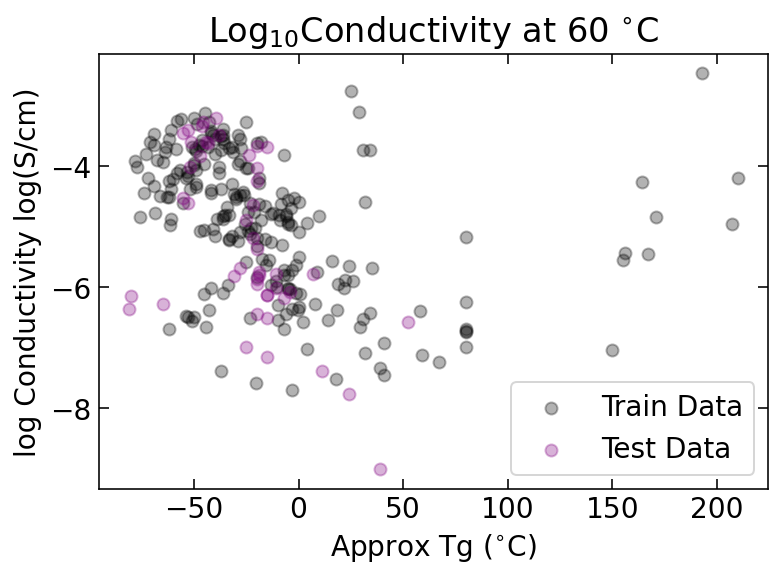

In [23]:
# plotting the train and test data to see what was chosen
plot_colors = ['black','teal','purple','blue','skyblue','pink','aqua','indianred','green',
               'sandybrown','gold','lightgreen','palegoldenrod']
plt.figure()
plt.scatter(X_train['approxTg'],y_train['logCond60'],alpha=0.3,c=plot_colors[0],label='Train Data')
plt.scatter(X_test['approxTg'],y_test['logCond60'],alpha=0.3,c=plot_colors[2],label='Test Data')
plt.ylabel(r'log Conductivity log(S/cm)')
plt.xlabel(r'Approx Tg ($^{\circ}$C)')
plt.title('Log$_{10}$Conductivity at 60 $^{\circ}$C')
plt.tick_params(which='major',direction='in', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(which='minor',direction='in', length=3, left=True, right=True)
plt.legend()
plt.show()

#### Save the split datasets to .CSV for future reference

In [25]:
train_name = 'Train_GroupSplit_PolymOnly_6_17_2020.csv'
test_name = 'Test__GroupSplit_PolymOnly_6_17_2020.csv'
file_path = r'C:\Users\nicol\Box Sync\Personal\Research\DataMining_PolymerElectrolyte_Review\DataSpreadsheets\ML_DataSplits\_' 
file_train = file_path + train_name
file_test = file_path + test_name

train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)
train_data.to_csv(file_train, sep=',',index = False)
test_data.to_csv(file_test, sep=',',index = False)

## Use Pipeline feature to scale, cross-validate, and fit models

"Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors." https://scikit-learn.org/stable/modules/compose.html

Also, import all possible ML models I might be interested in. Note: Dummy, Ridge, (Lasso...?) and Trees (Extra trees and Random forest) are most interesting because they allow you to visualize most important descriptors.

useful link for comparing algorithms consistently: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

Useful discussion on ridge vs lasso: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

In [24]:
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import KFold, GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn

Define any parameters that will be used for all model fits

In [25]:
scoring='neg_mean_squared_error'


Note on scoring parameter: choosing to use MSE instead of r^2, based somewhat off of this website: https://data.library.virginia.edu/is-r-squared-useless/

In [27]:
kfold = GroupKFold(n_splits = 5)

## Feature selection using RFECV and random forest, before re-training all models

Choose RF model, since that seems to perform the best. Use recursive feature selection with cross-validation to choose number of features

In [28]:
from sklearn.feature_selection import RFECV

In [29]:
rf_elim = RandomForestRegressor(random_state=SEED)

rfecv = RFECV(estimator=rf_elim, step=1, cv=kfold,scoring='neg_mean_squared_error')
rfecv.fit(X_train, np.ravel(y_train), groups = group_train)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFECV(cv=GroupKFold(n_splits=5),
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators='warn', n_jobs=None,
                                      oob_score=False, random_state=1,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [30]:
sklearn.show_versions()


System:
    python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
executable: C:\Users\nicol\Anaconda3\python.exe
   machine: Windows-10-10.0.18362-SP0

Python deps:
       pip: 19.2.3
setuptools: 41.4.0
   sklearn: 0.21.3
     numpy: 1.16.5
     scipy: 1.3.1
    Cython: 0.29.13
    pandas: 0.25.1


In [31]:
rfecv.n_features_

3

In [32]:
rfecv.ranking_

array([ 72,  26,  32,  24,  43,  98,  60,  89, 127,  88, 109, 142, 119,
       121, 116,  14, 136, 118,  83, 143, 161, 134, 170, 168, 157, 156,
        56,  40,  15, 145,  95,  30,  39, 101,  20, 149,  92,  27,  25,
        11,  85,  12,   3, 155, 102, 104,  22, 126,  53,  10,  93,  59,
        38,  18,  71, 129,   8, 106,  37, 125,  35, 162, 105,   4, 166,
        46, 135,  86, 146, 141, 163, 139, 144,  76, 120, 117, 152, 153,
       173, 140, 131, 160,  63,  51,  45, 132,  73,  49,  61, 151, 133,
        55,  17,  80,   7,  84,  50,  78,  42,   1,  70,   6,  19,  87,
        82,  29, 164,  57,  23,  66,  99,  91, 115, 122,  62,  16,  75,
        97, 154,  96, 100,  13, 150,  58, 123,  77,  90, 110, 158, 165,
       124, 159, 147,  69, 112,  28,  81,  68, 169, 128,  67,  21, 171,
       111, 114,  44, 103,  74, 148, 172, 108,  47,  36,  52,  65, 107,
        94,  48,   9,   5,  33,  64,  79,  54, 138, 130, 113,  31,  41,
       137,  34,   1,   1,   2, 167])

In [33]:
feature_RFE = pd.DataFrame({'Feature':X_train.columns,'Ranking':rfecv.ranking_})
feature_RFE

,Feature,Ranking
0,Comonomer percentage,72
1,crystalline?,26
2,drying temp,32
3,drying time (h),24
4,drying vacuum,43
...,...,...
170,solvent BP,34
171,approxTg,1
172,approxMW(kDa),1
173,log Li:functional group,2


In [34]:
sorted_feature_RFE = feature_RFE.sort_values(by='Ranking',ascending=True)
sorted_feature_RFE

,Feature,Ranking
99,Comonomer2 AETA_eta_F,1
172,approxMW(kDa),1
171,approxTg,1
173,log Li:functional group,2
42,Comonomer1 AETA_eta_FL,3
...,...,...
138,anion nBr,169
22,Comonomer1 nCl,170
142,anion ETA_shape_y,171
149,anion AETA_beta_ns_d,172


In [35]:
sorted_feature_RFE[0:rfecv.n_features_]

,Feature,Ranking
99,Comonomer2 AETA_eta_F,1
172,approxMW(kDa),1
171,approxTg,1


In [36]:
sorted_feature_RFE[0:20]

,Feature,Ranking
99,Comonomer2 AETA_eta_F,1
172,approxMW(kDa),1
171,approxTg,1
173,log Li:functional group,2
42,Comonomer1 AETA_eta_FL,3
63,Comonomer2 bpol,4
159,anion ETA_dAlpha_B,5
101,Comonomer2 AETA_eta_FL,6
94,Comonomer2 AETA_eta_L,7
56,Comonomer1 ETA_dEpsilon_C,8


In [37]:
X_train_RFE = X_train[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

In [38]:
X_train_RFE

,Comonomer2 AETA_eta_F,approxMW(kDa),approxTg
0,0.270360,37.0,-3.0
1,0.270360,37.0,-20.0
2,0.270360,37.0,-33.0
3,0.270360,37.0,-62.0
4,0.270360,37.0,-14.0
...,...,...,...
264,0.460931,7.4,-48.3
265,0.452204,44.0,18.0
266,0.452204,190.0,-20.0
268,0.331366,1000.0,-68.6


In [39]:
X_test_RFE = X_test[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

#### Explore correlation matrix of reduced feature set

In [40]:
data_for_corr = data_ML_X[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

In [41]:
data_for_corr.columns

Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)', 'approxTg'], dtype='object')

In [42]:
column_order = ['approxMW(kDa)', 'approxTg','Comonomer2 AETA_eta_F']


In [43]:
data_for_corr = data_for_corr.reindex(columns=column_order)

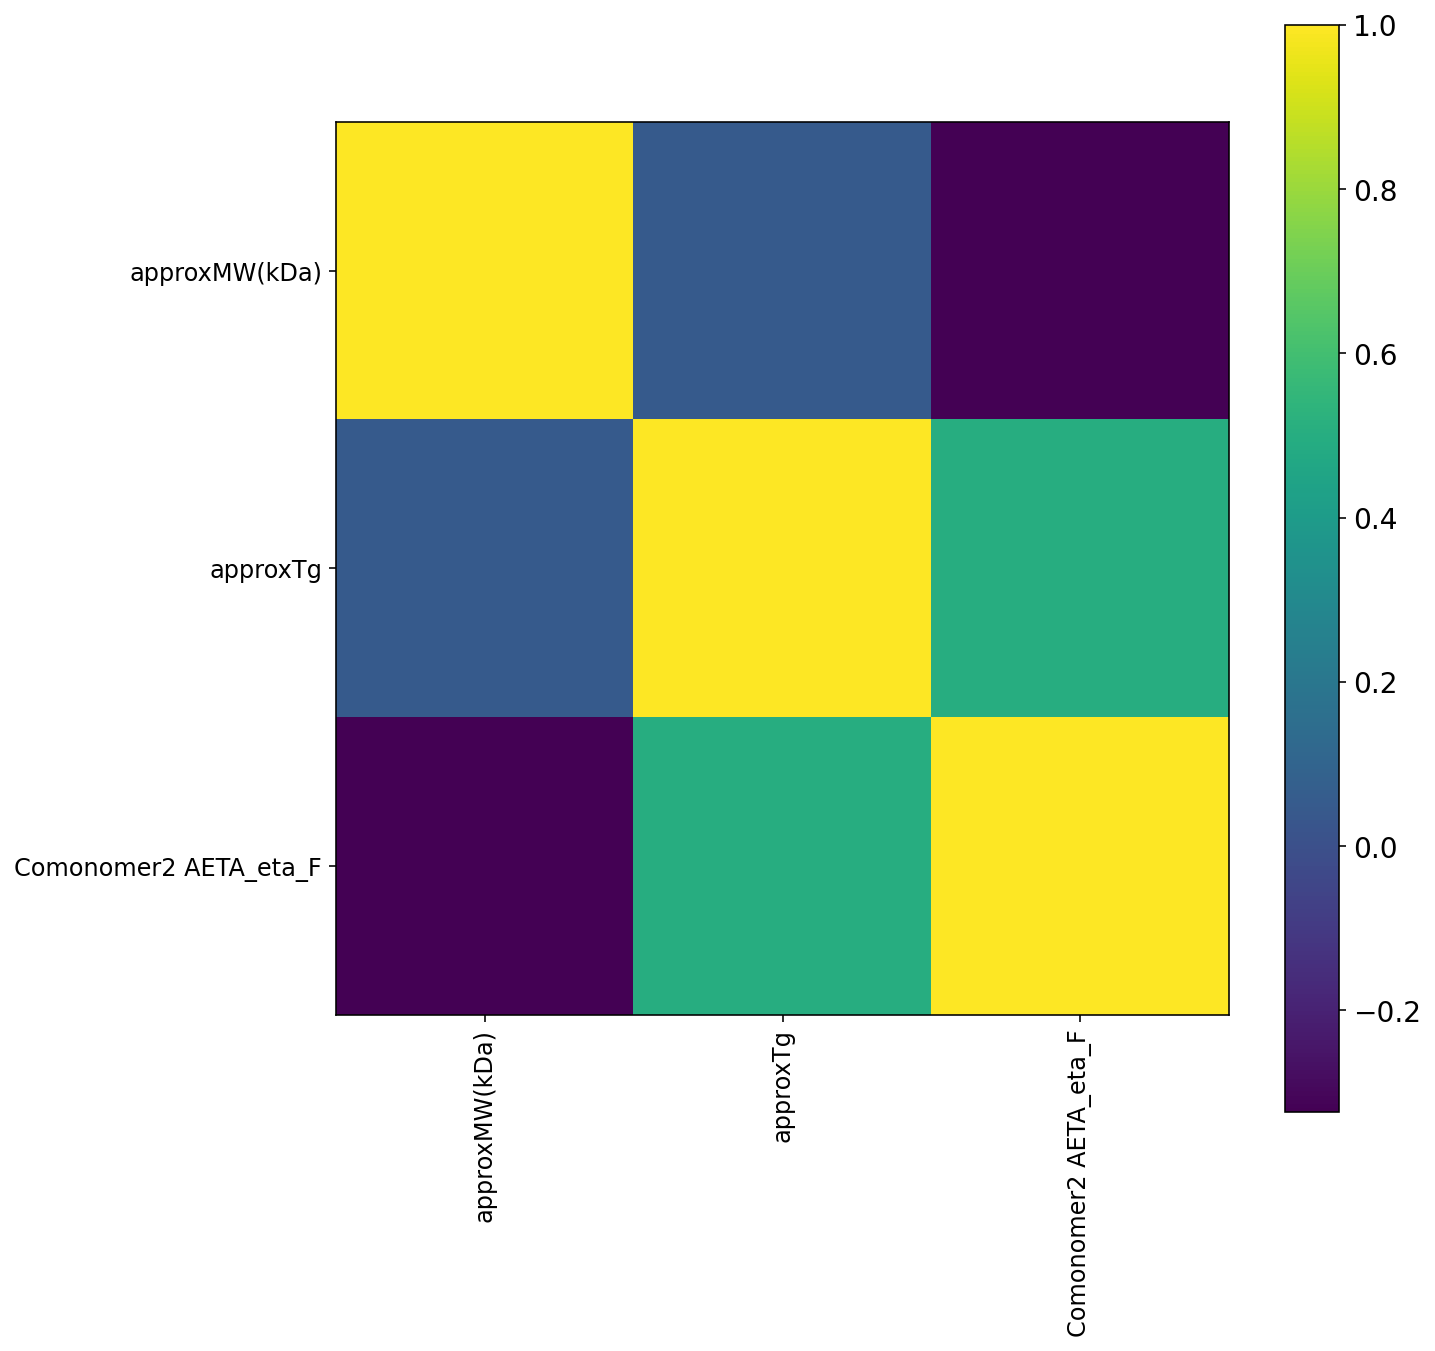

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(data_for_corr.corr())
plt.xticks(range(data_for_corr.shape[1]), data_for_corr.columns, fontsize=12,rotation=90)
plt.yticks(range(data_for_corr.shape[1]), data_for_corr.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

### Now, train models with smaller feature set

#### Dummy regression

In [45]:
pipe_dummy = make_pipeline(StandardScaler(), Normalizer(), DummyRegressor())
dummy_RFE = cross_validate(pipe_dummy,X_train_RFE,y_train,scoring=scoring,cv=kfold,return_train_score=True, groups = group_train)
test_scores_dummy = -np.array(dummy_RFE['test_score'])
print('Test scores (MSE):', test_scores_dummy)
train_scores_dummy = -np.array(dummy_RFE['train_score'])
print('Train scores (MSE):', train_scores_dummy)
mean_test_scores_dummy = np.mean(-np.array(dummy_RFE['test_score']))
print('Mean test score (MSE):', mean_test_scores_dummy)
mean_train_scores_dummy = np.mean(-np.array(dummy_RFE['train_score']))
print('Mean train score (MSE):', mean_train_scores_dummy)



Test scores (MSE): [1.74851074 1.74935799 0.79585845 0.83135655 1.41878294]
Train scores (MSE): [1.18934478 1.18520552 1.42340345 1.41774946 1.26766768]
Mean test score (MSE): 1.3087733322527857
Mean train score (MSE): 1.29667417706767


#### Ridge regression

In [46]:
pipe_ridge = make_pipeline(StandardScaler(), Normalizer(), Ridge(random_state=SEED))
param_grid_ridge = {'ridge__alpha':[1e-7,1e-5,1e-3,5e-3,1e-2,5e-2,1e-1,.5,1,10]}
ridge_clf = GridSearchCV(pipe_ridge,param_grid_ridge,scoring=scoring, cv=kfold,return_train_score=True)

Mean test scores (ridge): [0.86393792 0.8639379  0.86393647 0.8639307  0.8639235  0.86386641
 0.86379636 0.86328724 0.86277317 0.86875471]
Mean train scores (ridge): [0.74764621 0.74764621 0.74764621 0.74764622 0.74764624 0.74764681
 0.74764861 0.74770494 0.74787554 0.76340644]


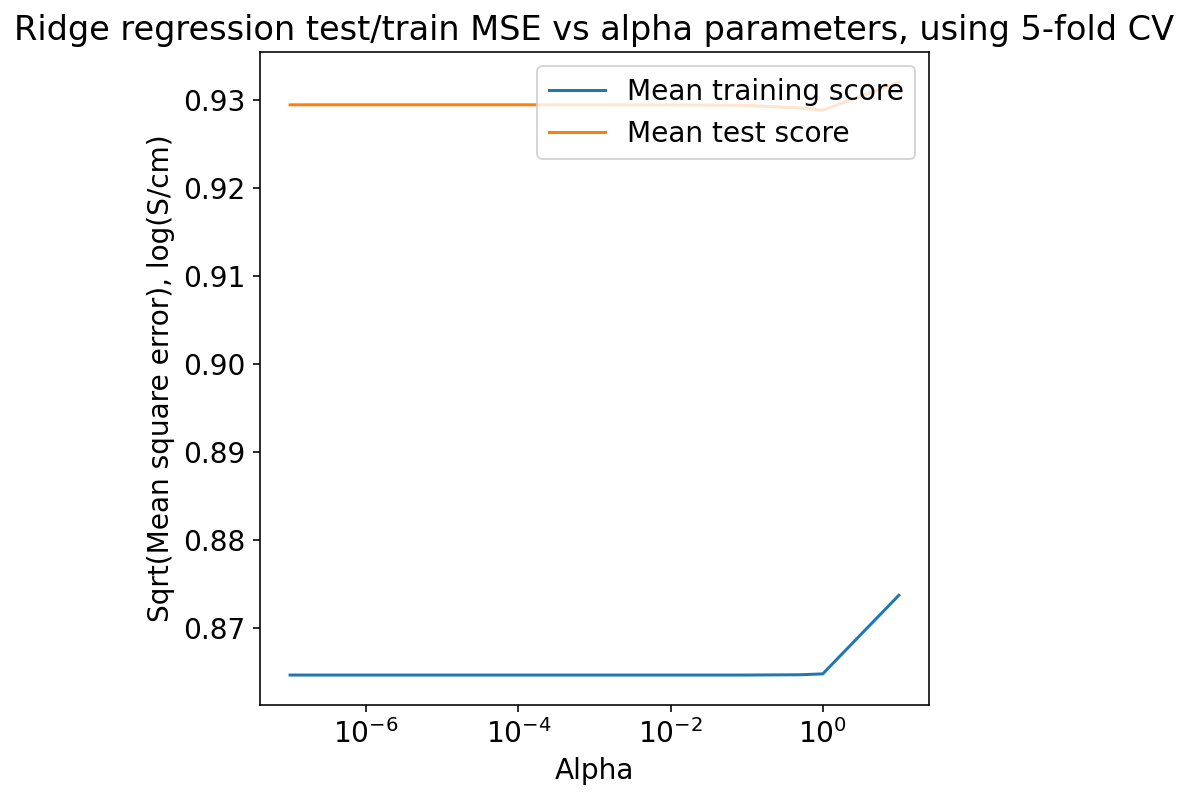

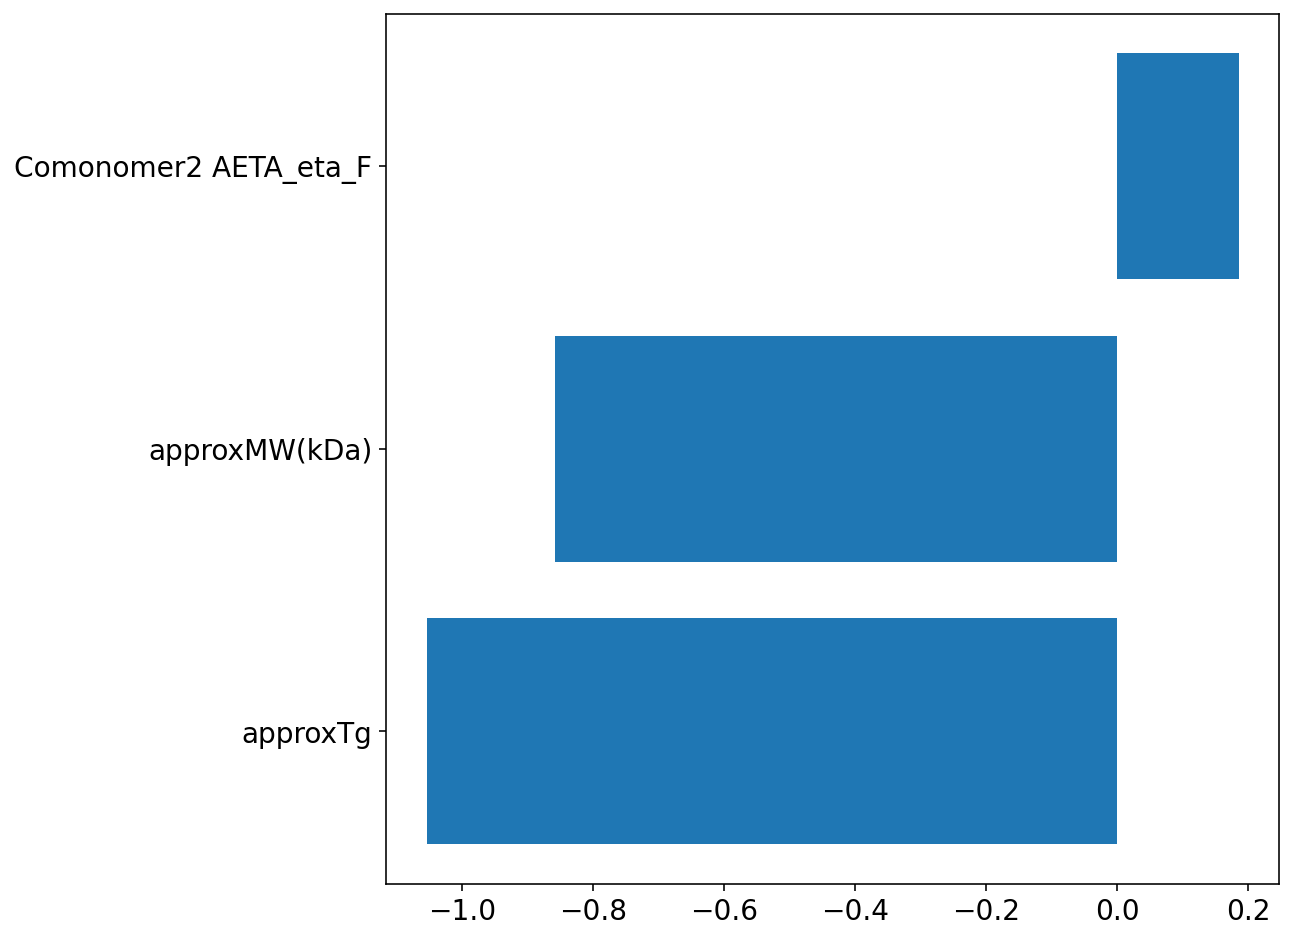

In [47]:
ridge_clf.fit(X_train_RFE,y_train, groups = group_train)

mean_test_scores = -np.array(ridge_clf.cv_results_['mean_test_score'])
print('Mean test scores (ridge):',mean_test_scores)

mean_train_scores = -np.array(ridge_clf.cv_results_['mean_train_score'])
print('Mean train scores (ridge):',mean_train_scores)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Ridge regression test/train MSE vs alpha parameters, using 5-fold CV')
plt.plot(param_grid_ridge['ridge__alpha'], (np.sqrt(mean_train_scores)),label='Mean training score')
plt.plot(param_grid_ridge['ridge__alpha'], (np.sqrt(mean_test_scores)), label='Mean test score')
plt.legend(loc='upper right')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Sqrt(Mean square error), log(S/cm)')#Mean square error
# fig.tight_layout()
plt.show()


ridge_best_rfe = ridge_clf.best_estimator_
ridge_best_rfe.fit(X_train_RFE,y_train)

ridge_coefs_rfe = ridge_best_rfe.named_steps['ridge'].coef_[0]
Descriptor_rr_df_rfe = pd.DataFrame()
Descriptor_rr_df_rfe['descriptor'] = X_train_RFE.columns
Descriptor_rr_df_rfe['ridge_coefficient'] = ridge_coefs_rfe

ordered_importance_rr_rfe = Descriptor_rr_df_rfe.sort_values(by = ['ridge_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_rr_rfe['descriptor'],ordered_importance_rr_rfe['ridge_coefficient'])
ax.invert_yaxis()
# plt.xticks(rotation=90)
# make_axes_area_auto_adjustable(ax)
plt.show()

In [48]:
ridge_best_rfe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('ridge',
                 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=1, solver='auto',
                       tol=0.001))],
         verbose=False)

#### Random Forest regression

Mean test scores: [1.07165494 1.14290726 1.1743789  1.16310889 1.10006853 1.18835493
 1.20524114 1.18821845 1.11222212 1.19783877 1.23450862 1.21988927
 1.09640155 1.19440565 1.23453067 1.21978263]
Mean train scores: [0.31414004 0.29813728 0.29722324 0.29555928 0.17263067 0.16191408
 0.1604004  0.15887076 0.12567082 0.11336534 0.11147543 0.10991271
 0.10701889 0.09709885 0.09542387 0.09399809]


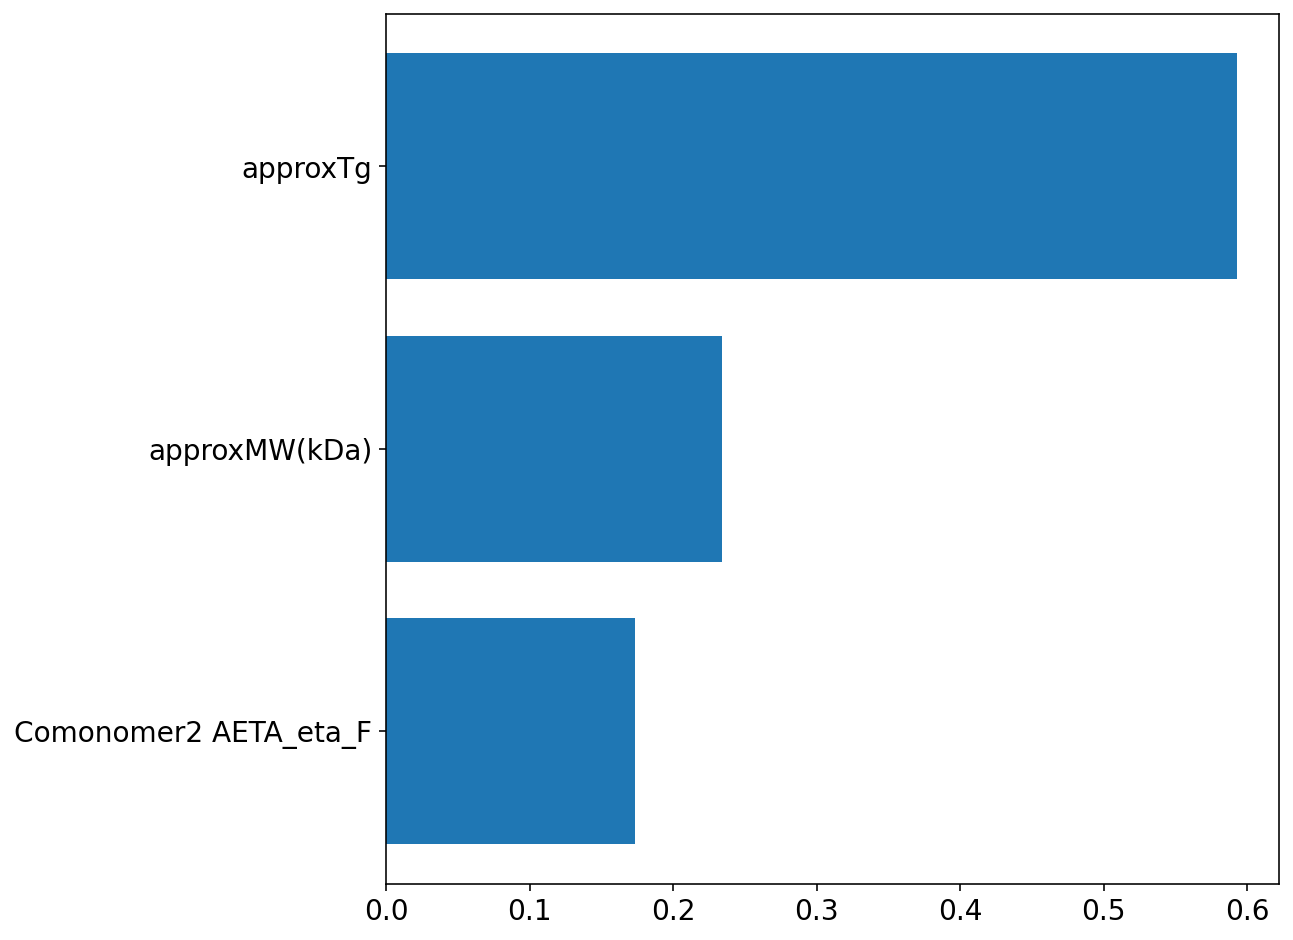

In [50]:
pipe_rf = make_pipeline(StandardScaler(), Normalizer(), RandomForestRegressor(random_state=SEED))
param_grid_rf = {'randomforestregressor__n_estimators':[10,50,100,500],
                'randomforestregressor__max_depth':[4,6,8,10]}
rf_grid_rfe = GridSearchCV(pipe_rf,param_grid_rf,scoring=scoring, cv=kfold,return_train_score=True)

rf_grid_rfe.fit(X_train_RFE,np.ravel(y_train), groups = group_train)
mean_test_scores_rf= -np.array(rf_grid_rfe.cv_results_['mean_test_score'])
print('Mean test scores:', mean_test_scores_rf)
mean_train_scores_rf = -np.array(rf_grid_rfe.cv_results_['mean_train_score'])
print('Mean train scores:', mean_train_scores_rf)

rf_grid_df_rfe = pd.DataFrame.from_dict(rf_grid_rfe.cv_results_)
# rf_grid_df

rf_best_rfe = rf_grid_rfe.best_estimator_
rf_best_rfe.fit(X_train_RFE,np.ravel(y_train))

importance_rfe = rf_best_rfe.named_steps['randomforestregressor'].feature_importances_

Descriptor_rf_df_rfe = pd.DataFrame()
Descriptor_rf_df_rfe['descriptor'] = X_train_RFE.columns
Descriptor_rf_df_rfe['rf_coefficient'] = importance_rfe
# Descriptor_rf_df.head()

ordered_importance_rf_rfe = Descriptor_rf_df_rfe.sort_values(by = ['rf_coefficient'],ascending = False)

plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_rf_rfe['descriptor'][0:20],ordered_importance_rf_rfe['rf_coefficient'][0:20])
ax.invert_yaxis()
# plt.xticks(rotation=90)
# make_axes_area_auto_adjustable(ax)
plt.show()

In [51]:
rf_best_rfe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=4, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=1,
                                       verbose=0, warm_start=False))],
         verbose=False)

#### Gradient Boosting regression

Mean test scores (MSE): [1.13923918 1.42055073 1.4843509  1.49509475 1.4971066  1.27122592
 1.52045092 1.53484035 1.54704209 1.54709367 1.25203159 1.56550767
 1.5738619  1.57661658 1.5766249  1.39583049 1.78647008 1.79210666
 1.79228148 1.79228179]
Mean train scores (MSE): [0.40803127 0.09944857 0.05112501 0.02351867 0.02347845 0.26237222
 0.03495467 0.0254215  0.02347848 0.0234784  0.20638792 0.02464971
 0.02354088 0.0234784  0.0234784  0.18637645 0.02364016 0.02347904
 0.0234784  0.0234784 ]


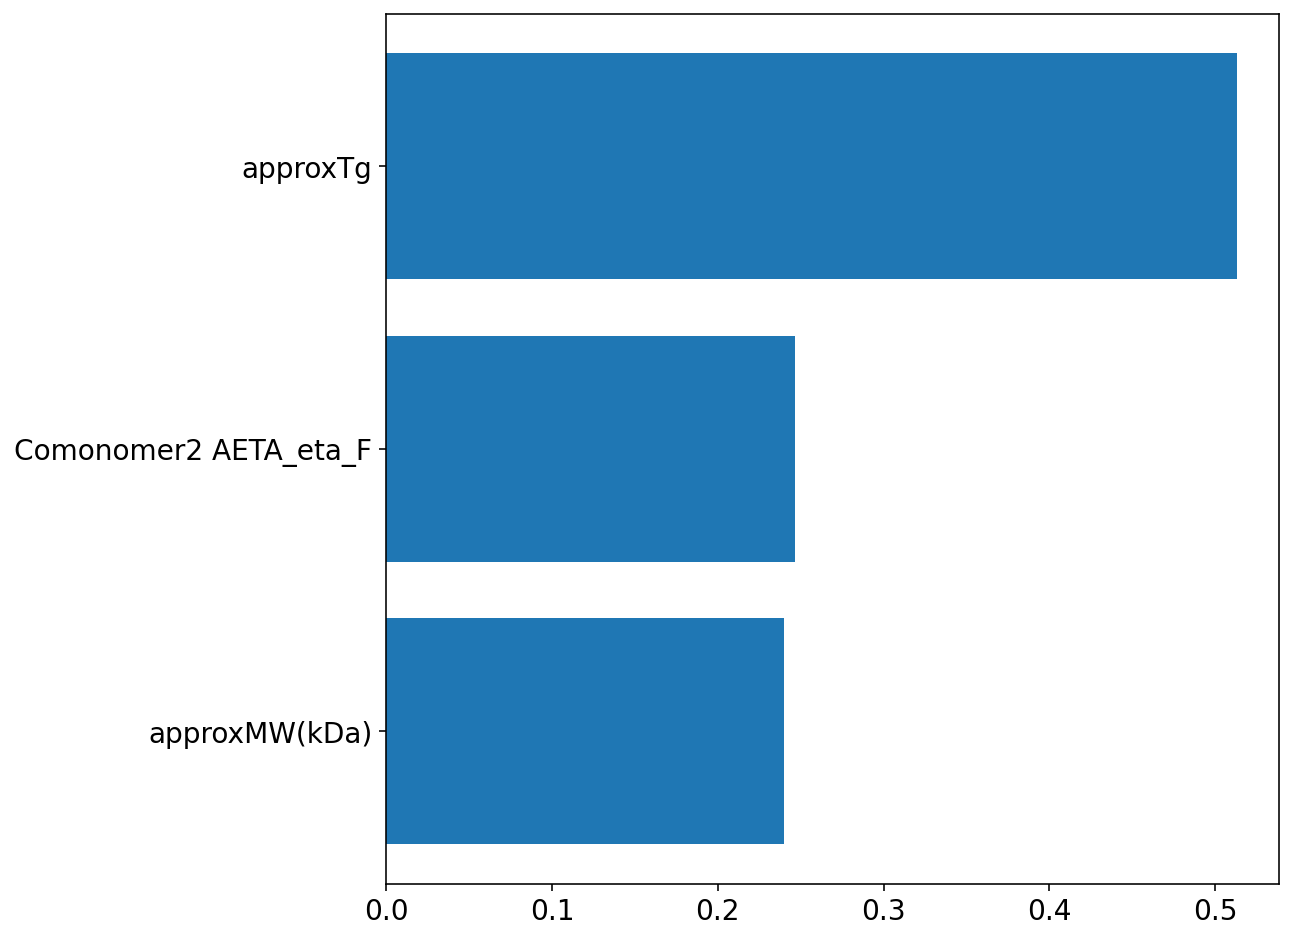

In [52]:
# parameters to play around with: learning_rate, n_estimators, subsample, max_depth

pipe_gbr = make_pipeline(StandardScaler(), Normalizer(), GradientBoostingRegressor(random_state=SEED))
param_grid_gbr = {'gradientboostingregressor__n_estimators':[10,50,100,500,1000],
                'gradientboostingregressor__max_depth':[4,6,8,10]}
gbr_grid = GridSearchCV(pipe_gbr,param_grid_gbr,scoring=scoring, cv=kfold,return_train_score=True)
gbr_grid.fit(X_train_RFE,np.ravel(y_train), groups = group_train)

mean_test_scores_gbr= -np.array(gbr_grid.cv_results_['mean_test_score'])
print('Mean test scores (MSE):', mean_test_scores_gbr)
mean_train_scores_gbr = -np.array(gbr_grid.cv_results_['mean_train_score'])
print('Mean train scores (MSE):', mean_train_scores_gbr)

gb_best = gbr_grid.best_estimator_
gb_best.fit(X_train_RFE,np.ravel(y_train))

importance_gb = gb_best.named_steps['gradientboostingregressor'].feature_importances_
Descriptor_gb_df = pd.DataFrame()
Descriptor_gb_df['descriptor'] = X_train_RFE.columns
Descriptor_gb_df['gb_coefficient'] = importance_gb
ordered_importance_gb = Descriptor_gb_df.sort_values(by = ['gb_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_gb['descriptor'],ordered_importance_gb['gb_coefficient'])
ax.invert_yaxis()
plt.show()

In [53]:
gb_best

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.1,
                                           loss='ls', max_depth=4,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=10,
           

#### Extra Trees regression

Mean test scores: [0.93014146 0.90045899 0.89156755 0.88887881 0.99939377 0.96562124
 0.94388357 0.95776512 1.09746579 1.11344298 1.05899436 1.07736816
 1.11170027 1.12602832 1.10599133 1.0970595 ]
Mean train scores: [0.48697529 0.50581605 0.50651481 0.50290669 0.26180711 0.26512208
 0.26402829 0.26551865 0.1113203  0.10386386 0.1049274  0.10666634
 0.05351787 0.0429849  0.04314456 0.04336708]


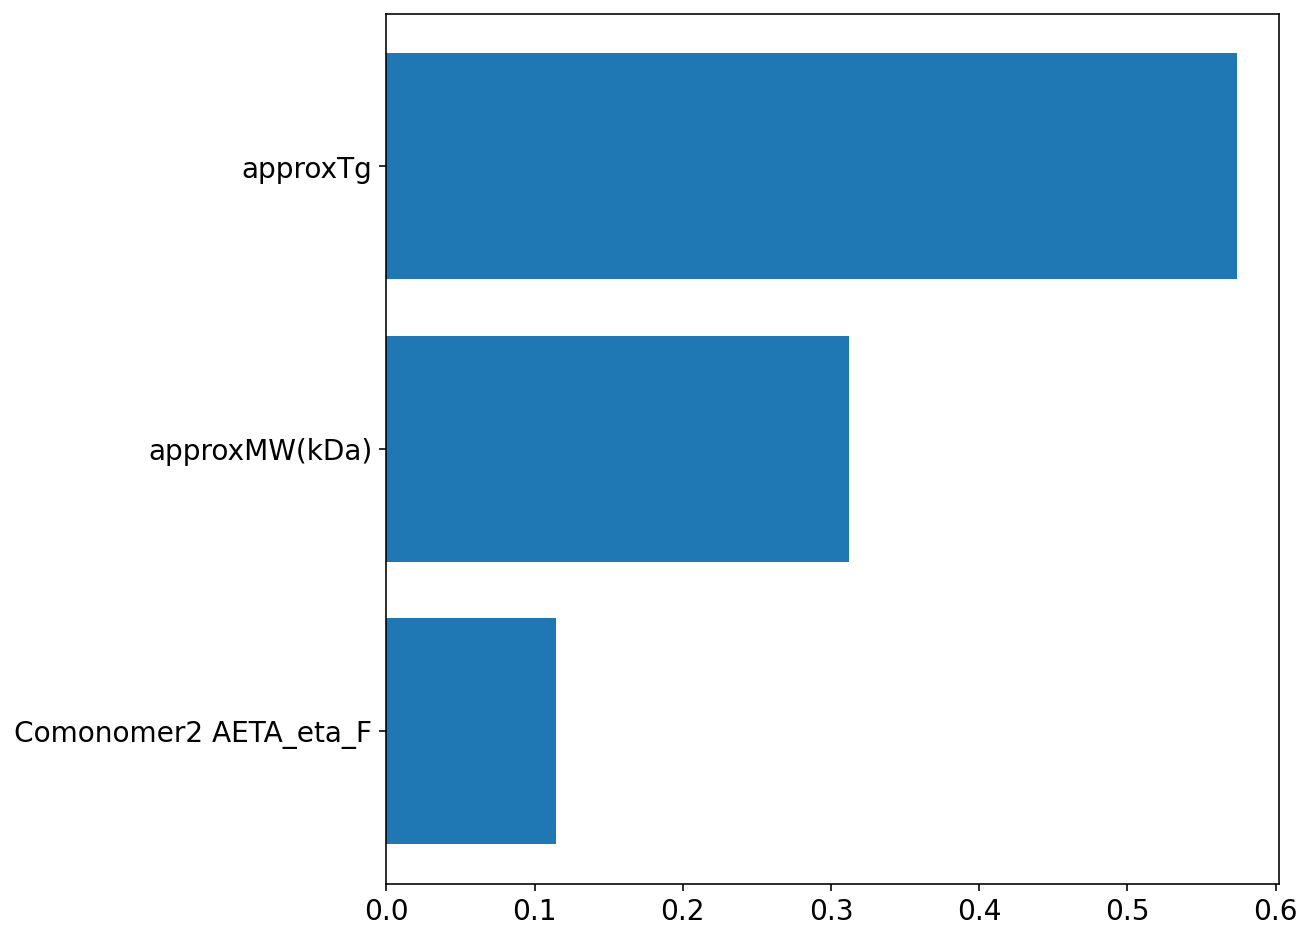

In [54]:
pipe_etr = make_pipeline(StandardScaler(), Normalizer(), ExtraTreesRegressor(random_state=SEED))
param_grid_etr = {'extratreesregressor__n_estimators':[10,50,100,500],
                'extratreesregressor__max_depth':[4,6,8,10]}
etr_grid_rfe = GridSearchCV(pipe_etr,param_grid_etr,scoring=scoring, cv=kfold,return_train_score=True)
etr_grid_rfe.fit(X_train_RFE,np.ravel(y_train), groups = group_train)

mean_test_scores_etr= -np.array(etr_grid_rfe.cv_results_['mean_test_score'])
print('Mean test scores:', mean_test_scores_etr)
mean_train_scores_etr = -np.array(etr_grid_rfe.cv_results_['mean_train_score'])
print('Mean train scores:', mean_train_scores_etr)

et_best_rfe = etr_grid_rfe.best_estimator_
et_best_rfe.fit(X_train_RFE,np.ravel(y_train))

importance_et_rfe = et_best_rfe.named_steps['extratreesregressor'].feature_importances_
Descriptor_et_df_rfe = pd.DataFrame()
Descriptor_et_df_rfe['descriptor'] = X_train_RFE.columns
Descriptor_et_df_rfe['et_coefficient'] = importance_et_rfe
ordered_importance_et_rfe = Descriptor_et_df_rfe.sort_values(by = ['et_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_et_rfe['descriptor'],ordered_importance_et_rfe['et_coefficient'])
ax.invert_yaxis()
plt.show()

In [55]:
et_best_rfe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('extratreesregressor',
                 ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                     max_depth=4, max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=500, n_jobs=None,
                                     oob_score=False, random_state=1, verbose=0,
                                     warm_start=False))],
         verbose=False)

#### Compare all best estimators and plot

In [56]:
scores = ['neg_mean_squared_error','neg_mean_absolute_error','r2']

df_metrics_RFE = pd.DataFrame(columns = ['Model','model_params','rMSE_train','MAE_train','r2_train',
                                     'rMSE_val','MAE_val','r2_val','Features','Feature importance'])

dummy_RFE = cross_validate(pipe_dummy,X_train_RFE,y_train,scoring=scores,cv=kfold,return_train_score=True, groups = group_train)
row = {'Model':'Dummy','model_params':pipe_dummy.named_steps['dummyregressor'],
       'rMSE_train':np.sqrt(np.mean(-dummy_RFE['train_neg_mean_squared_error'])),
      'rMSE_val':np.sqrt(np.mean(-dummy_RFE['test_neg_mean_squared_error'])),
      'MAE_train':np.mean(-dummy_RFE['train_neg_mean_absolute_error']),
      'MAE_val':np.mean(-dummy_RFE['test_neg_mean_absolute_error']),
      'r2_train':np.mean(dummy_RFE['train_r2']),
      'r2_val':np.mean(dummy_RFE['test_r2']),}
df_metrics_RFE = df_metrics_RFE.append(row,ignore_index=True)

models = {'ridge':ridge_best_rfe,'randomforestregressor':rf_best_rfe,
          'gradientboostingregressor':gb_best,'extratreesregressor':et_best_rfe} #'lasso':lasso_best,

for model,name in models.items():
    training = cross_validate(name,X_train_RFE,np.ravel(y_train),scoring=scores,cv=kfold,return_train_score=True, groups = group_train)
    if model == 'ridge':
        descriptorimportance = name.named_steps[model].coef_[0]
    elif model == 'lasso':
        descriptorimportance = name.named_steps[model].coef_
    else:
        descriptorimportance = name.named_steps[model].feature_importances_
    new_row = {'Model':model,'model_params':name.named_steps[model],
           'rMSE_train':np.sqrt(np.mean(-training['train_neg_mean_squared_error'])),
          'rMSE_val':np.sqrt(np.mean(-training['test_neg_mean_squared_error'])),
          'MAE_train':np.mean(-training['train_neg_mean_absolute_error']),
          'MAE_val':np.mean(-training['test_neg_mean_absolute_error']),
          'r2_train':np.mean(training['train_r2']),
          'r2_val':np.mean(training['test_r2']),
              'Feature importance':descriptorimportance,
              'Features':X_train_RFE.columns}
    df_metrics_RFE = df_metrics_RFE.append(new_row,ignore_index=True)
    
df_metrics_RFE



,Model,model_params,rMSE_train,MAE_train,r2_train,rMSE_val,MAE_val,r2_val,Features,Feature importance
0,Dummy,"DummyRegressor(constant=None, quantile=None, s...",1.138716,0.945624,0.000000,1.144016,0.948335,-0.027278,NaN,NaN
1,ridge,"Ridge(alpha=1, copy_X=True, fit_intercept=True...",0.864798,0.621607,0.422209,0.928856,0.695259,0.302373,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.18547861106821328, -0.8581758084168912, -1...."
2,randomforestregressor,"(DecisionTreeRegressor(criterion='mse', max_de...",0.560482,0.422816,0.756030,1.035208,0.775610,0.114143,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.1732035240978536, 0.23401968534479273, 0.59..."
3,gradientboostingregressor,([DecisionTreeRegressor(criterion='friedman_ms...,0.638773,0.507983,0.684627,1.067351,0.838707,0.076684,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.2467339309682436, 0.24018261201193578, 0.51..."
4,extratreesregressor,"(ExtraTreeRegressor(criterion='mse', max_depth...",0.709159,0.522464,0.611842,0.942804,0.721304,0.263726,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.11427475842793758, 0.31204920485728865, 0.5..."


C:\Users\nicol\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


[Text(0, 0, 'Dummy'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Gradient Boosting'),
 Text(0, 0, 'Extra Trees')]

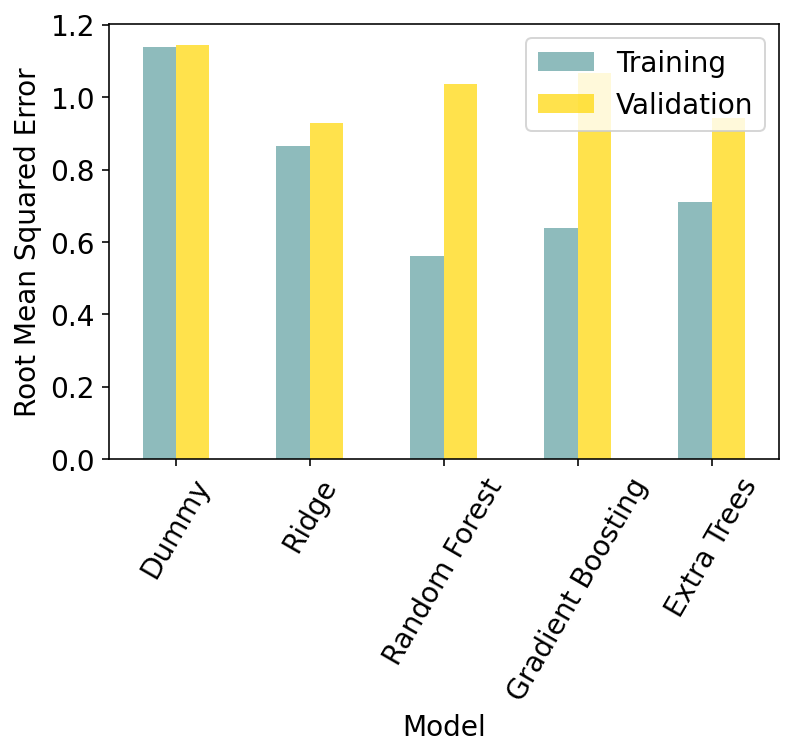

In [57]:
ax = df_metrics_RFE.plot('Model',['rMSE_train','rMSE_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('Root Mean Squared Error')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Dummy','Ridge','Random Forest','Gradient Boosting','Extra Trees'])

[Text(0, 0, 'Dummy'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Gradient Boosting'),
 Text(0, 0, 'Extra Trees')]

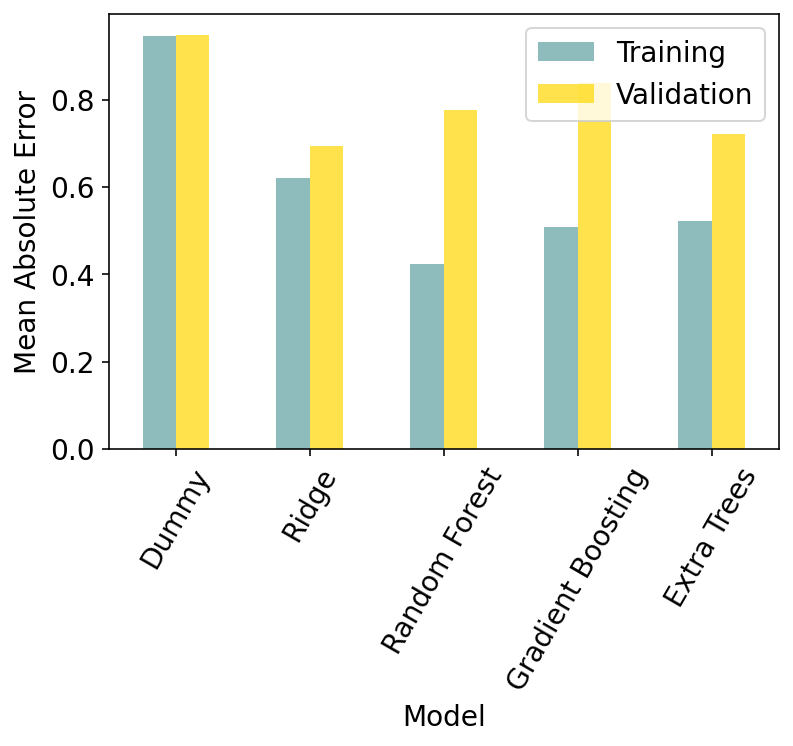

In [58]:
ax = df_metrics_RFE.plot('Model',['MAE_train','MAE_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('Mean Absolute Error')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Dummy','Ridge','Random Forest','Gradient Boosting','Extra Trees'])

[Text(0, 0, 'Dummy'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Gradient Boosting'),
 Text(0, 0, 'Extra Trees')]

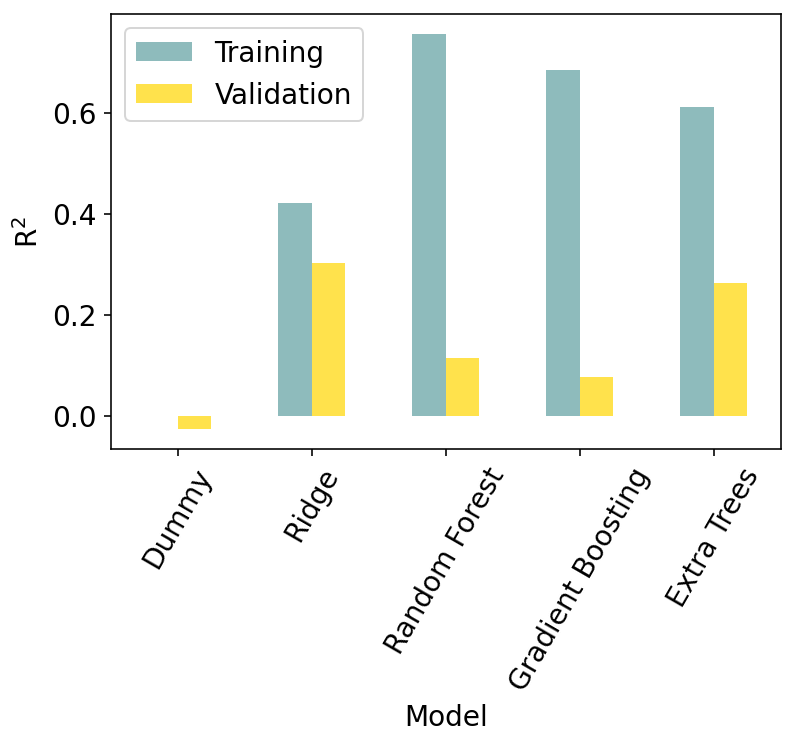

In [59]:
ax = df_metrics_RFE.plot('Model',['r2_train','r2_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('R$^2$')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Dummy','Ridge','Random Forest','Gradient Boosting','Extra Trees'])

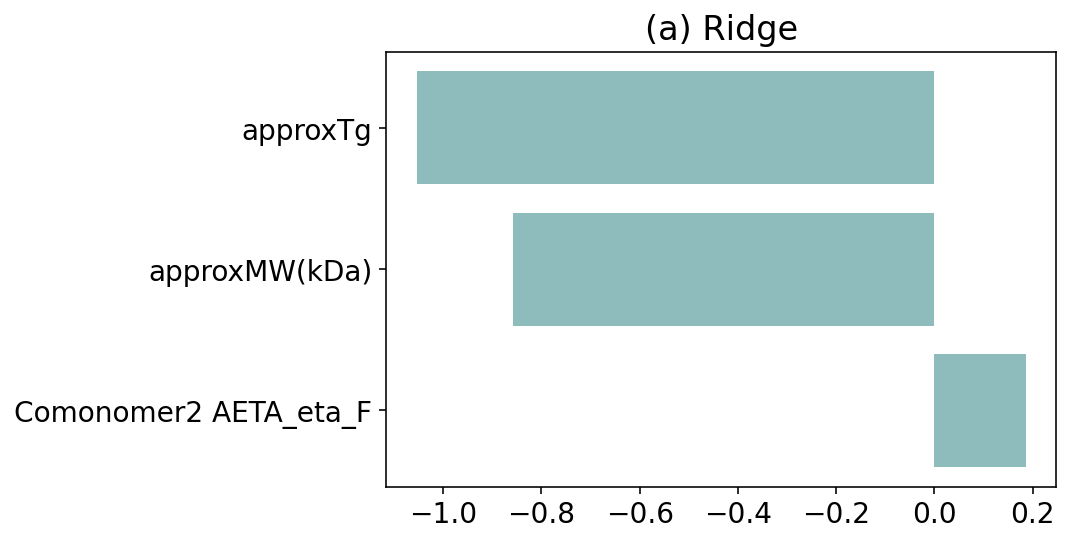

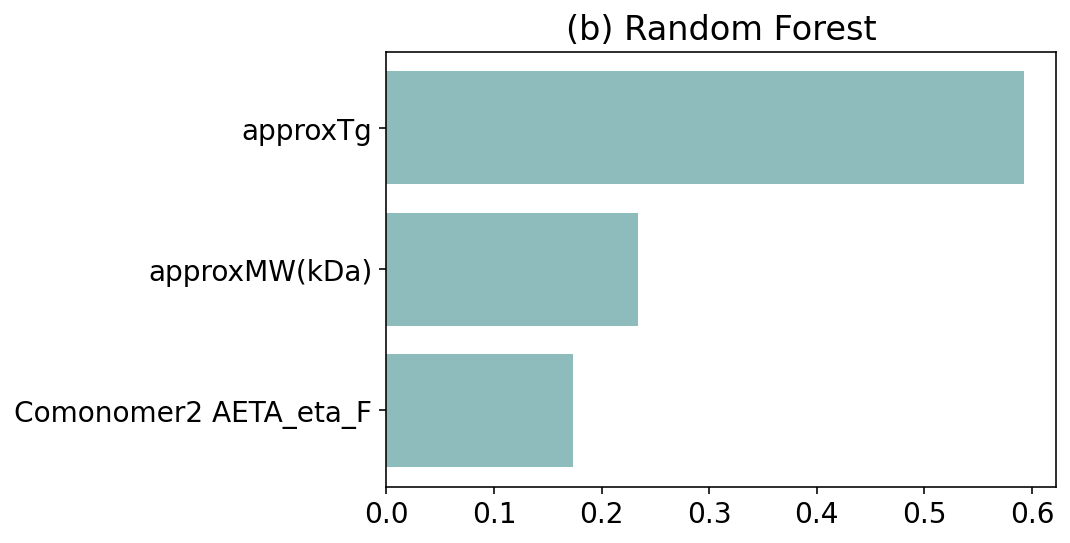

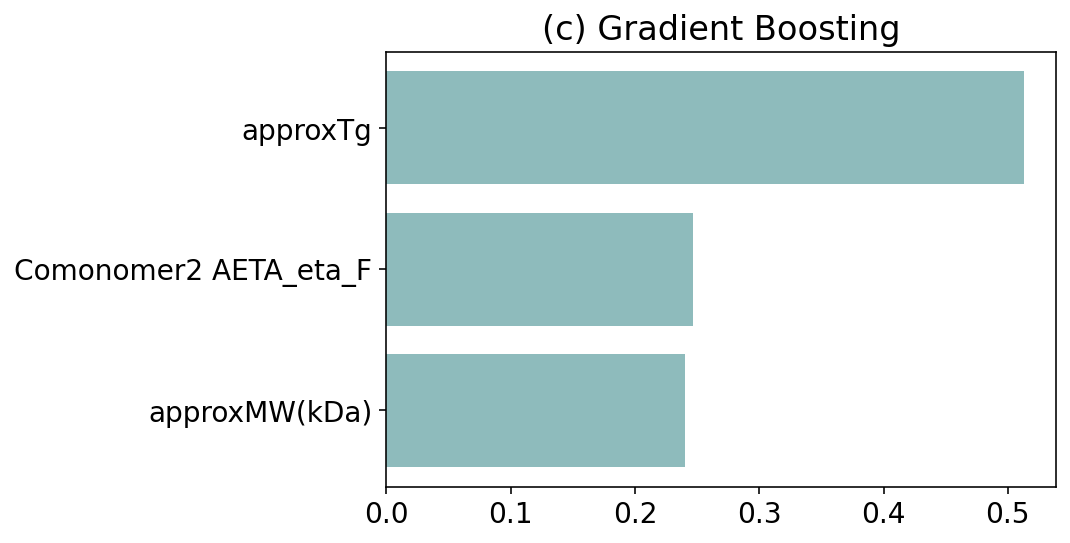

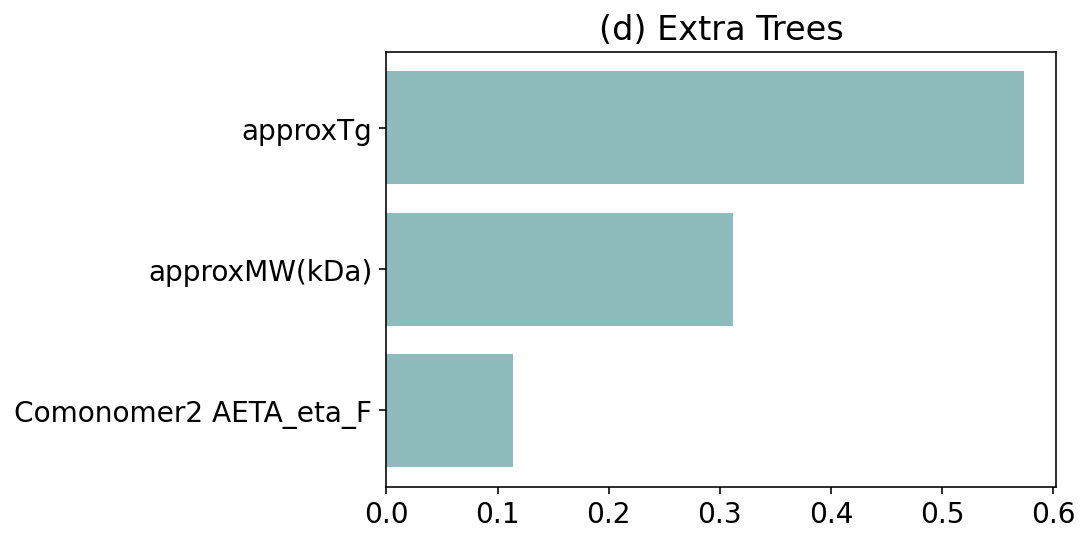

In [60]:
model = ['Dummy','(a) Ridge','(b) Random Forest','(c) Gradient Boosting','(d) Extra Trees']
for index in [1,2,3,4]: #,5
    Descriptors = pd.DataFrame()
    Descriptors['descriptor'] = df_metrics_RFE['Features'][index]
    Descriptors['coefficient'] = df_metrics_RFE['Feature importance'][index]
    Descriptors['abs_coeff'] = [abs(n) for n in Descriptors['coefficient']]
    ordered_importance = Descriptors.sort_values(by = ['abs_coeff'],ascending = False)
    plt.figure()
    ax=plt.axes()
    ax.barh(ordered_importance['descriptor'],ordered_importance['coefficient'],color = 'cadetblue',alpha=0.7)
    ax.invert_yaxis()
    plt.title(model[index])
    plt.show()

## Remove important features and re-train ridge, RF to check performance and additional feature importance

In [112]:
X_train_Sparse = X_train.drop(columns = ['approxTg','approxMW(kDa)']) #,'approxMW(kDa)'
X_test_Sparse = X_test.drop(columns = ['approxTg','approxMW(kDa)']) #,'approxMW(kDa)'

In [113]:
rf_elim = RandomForestRegressor(random_state=SEED)

rfecv = RFECV(estimator=rf_elim, step=1, cv=kfold,scoring='neg_mean_squared_error')
rfecv.fit(X_train_Sparse, np.ravel(y_train), groups = group_train)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFECV(cv=GroupKFold(n_splits=5),
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators='warn', n_jobs=None,
                                      oob_score=False, random_state=1,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [114]:
rfecv.n_features_

114

In [115]:
feature_RFE = pd.DataFrame({'Feature':X_train_Sparse.columns,'Ranking':rfecv.ranking_})
sorted_feature_RFE = feature_RFE.sort_values(by='Ranking',ascending=True)
sorted_feature_RFE[0:rfecv.n_features_]

,Feature,Ranking
0,Comonomer percentage,1
116,Comonomer2 ETA_psi_1,1
115,Comonomer2 AETA_dBeta,1
114,Comonomer2 ETA_dBeta,1
111,Comonomer2 ETA_epsilon_5,1
...,...,...
60,Comonomer1 ETA_psi_1,1
59,Comonomer1 AETA_dBeta,1
58,Comonomer1 ETA_dBeta,1
32,Comonomer1 AETA_beta_s,1


In [116]:
X_train_RFE_sparse = X_train_Sparse[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

X_test_RFE_sparse = X_test_Sparse[np.array(sorted_feature_RFE['Feature'][0:rfecv.n_features_])]

Mean test scores (ridge): [192.70615864  14.84650123   4.25277519   2.62668649   2.41671515
   2.11919616   2.02565694   1.87647943   1.78064914   1.4767962 ]
Mean train scores (ridge): [0.21049436 0.2131691  0.23805225 0.26809994 0.28580536 0.34386883
 0.37868212 0.50092986 0.58059137 0.93465899]


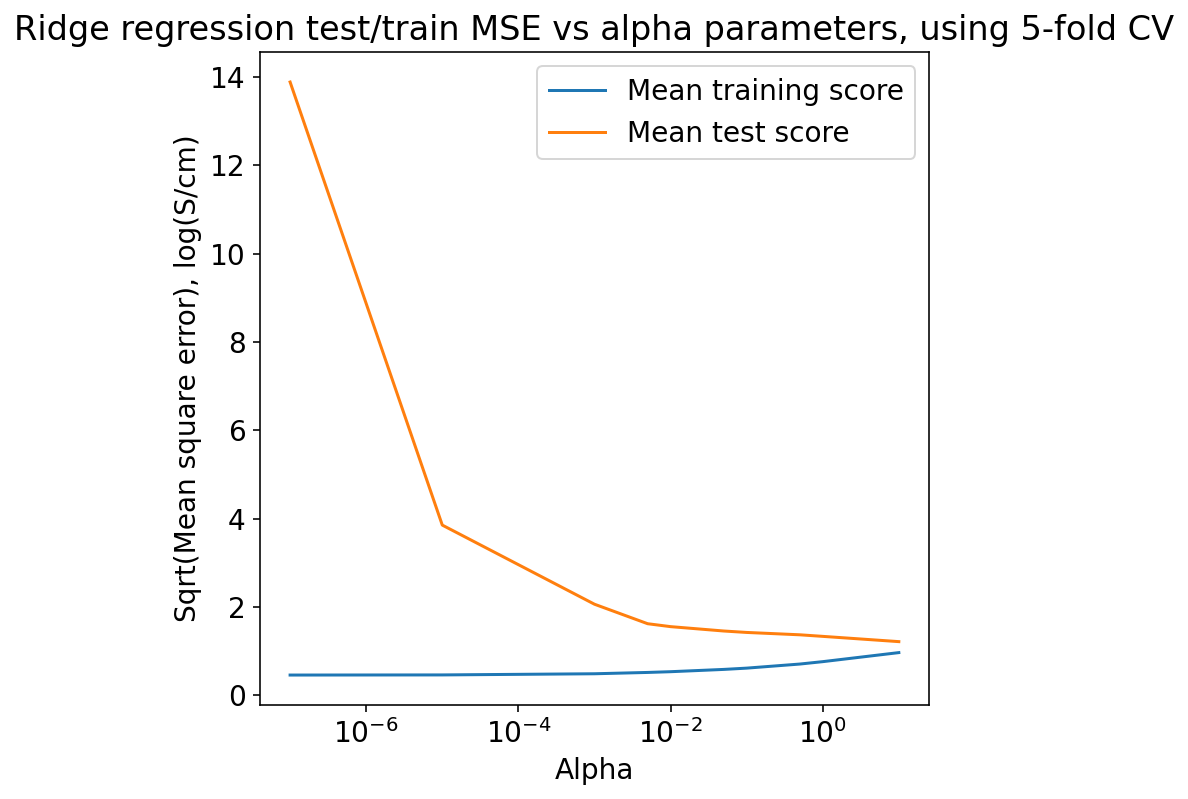

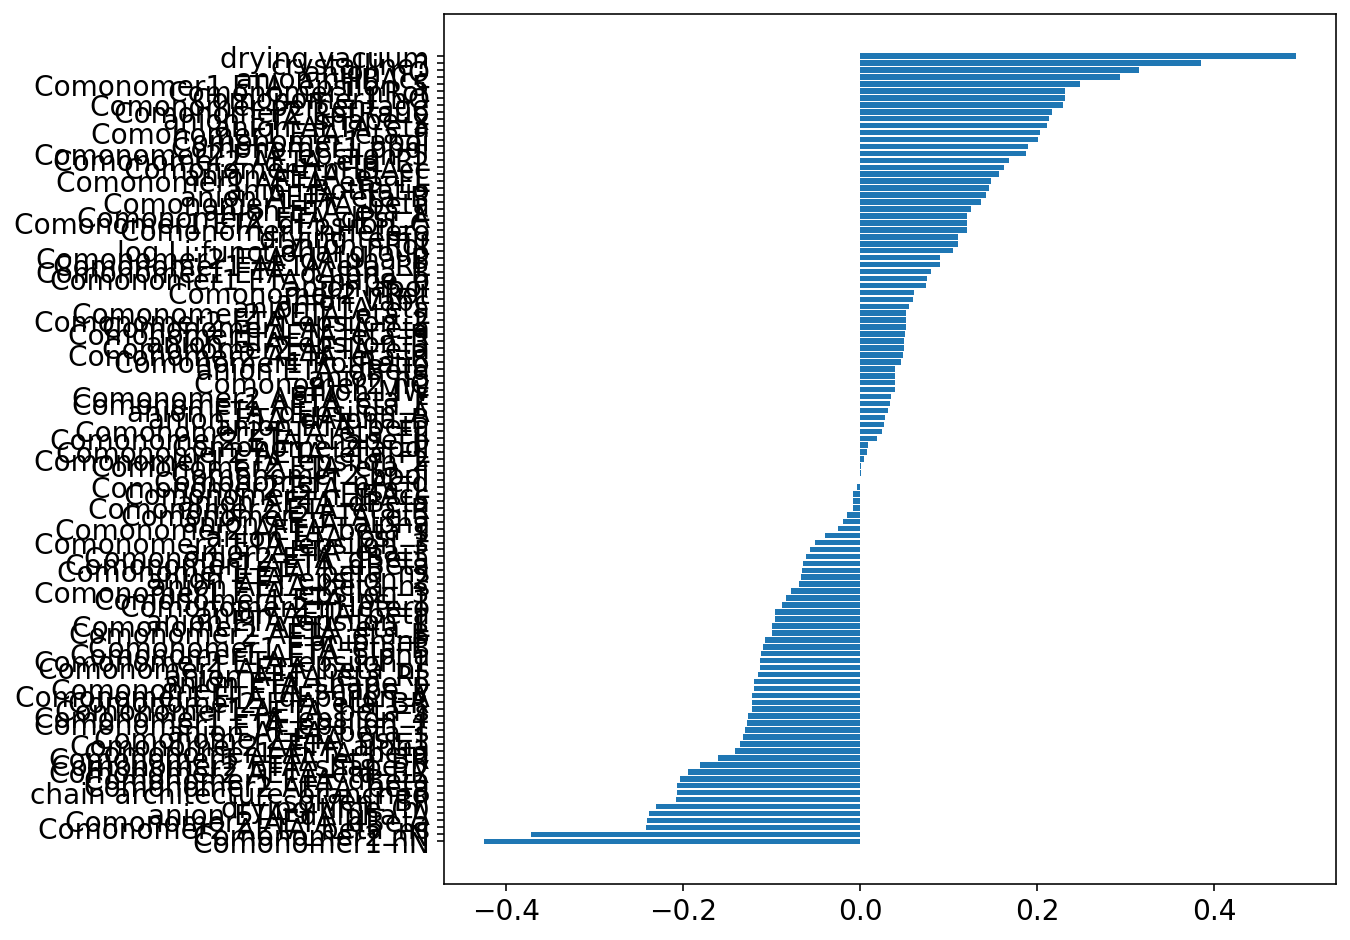

In [117]:
ridge_clf.fit(X_train_RFE_sparse,y_train, groups = group_train)

mean_test_scores = -np.array(ridge_clf.cv_results_['mean_test_score'])
print('Mean test scores (ridge):',mean_test_scores)

mean_train_scores = -np.array(ridge_clf.cv_results_['mean_train_score'])
print('Mean train scores (ridge):',mean_train_scores)

fig = plt.figure(figsize=(6, 6))
# plt.subplot(1, 1, 1)
plt.title('Ridge regression test/train MSE vs alpha parameters, using 5-fold CV')
plt.plot(param_grid_ridge['ridge__alpha'], (np.sqrt(mean_train_scores)),label='Mean training score')
plt.plot(param_grid_ridge['ridge__alpha'], (np.sqrt(mean_test_scores)), label='Mean test score')
plt.legend(loc='upper right')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Sqrt(Mean square error), log(S/cm)')#Mean square error
# fig.tight_layout()
plt.show()


ridge_best_sp = ridge_clf.best_estimator_
ridge_best_sp.fit(X_train_RFE_sparse,y_train)

ridge_coefs_sp = ridge_best_sp.named_steps['ridge'].coef_[0]
Descriptor_rr_df_sp = pd.DataFrame()
Descriptor_rr_df_sp['descriptor'] = X_train_RFE_sparse.columns
Descriptor_rr_df_sp['ridge_coefficient'] = ridge_coefs_sp

ordered_importance_rr_sp = Descriptor_rr_df_sp.sort_values(by = ['ridge_coefficient'],ascending = False)
plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_rr_sp['descriptor'],ordered_importance_rr_sp['ridge_coefficient'])
ax.invert_yaxis()
# plt.xticks(rotation=90)
# make_axes_area_auto_adjustable(ax)
plt.show()

Mean test scores: [1.33947192 1.33248973 1.29708592 1.35186075 1.32964463 1.30083865
 1.27641328 1.32157039 1.3257821  1.29176115 1.28717408 1.31570205
 1.24088631 1.27529793 1.24288841 1.300779  ]
Mean train scores: [0.23580869 0.21879723 0.21498775 0.21539016 0.12755502 0.11000201
 0.10871519 0.10831802 0.09296293 0.0779399  0.07639656 0.07502594
 0.08494942 0.06979087 0.06828921 0.06654455]


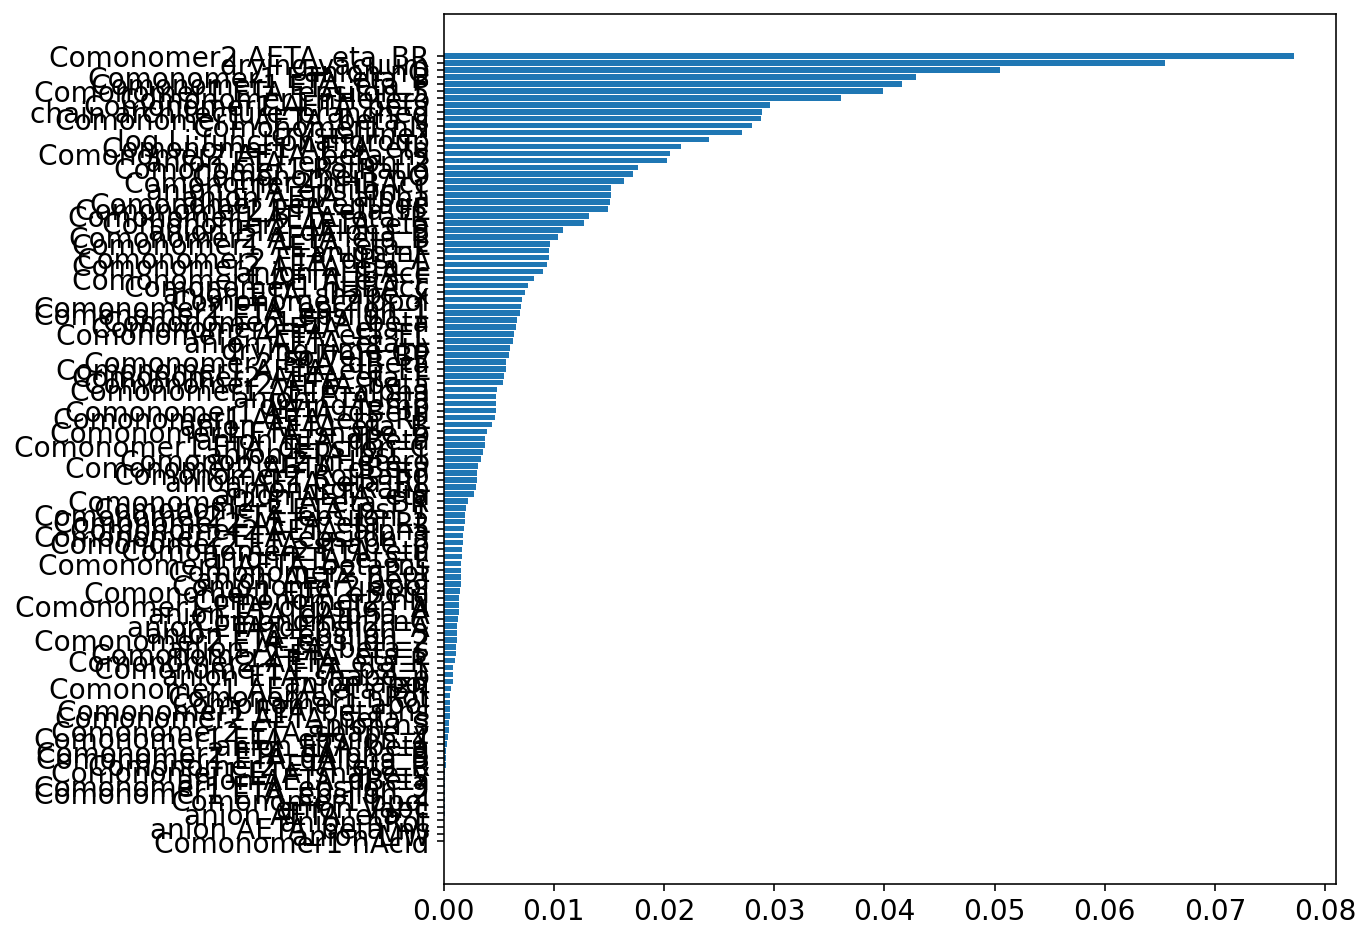

In [118]:
rf_grid_sp = GridSearchCV(pipe_rf,param_grid_rf,scoring=scoring, cv=kfold,return_train_score=True)

rf_grid_sp.fit(X_train_RFE_sparse,np.ravel(y_train), groups = group_train)
mean_test_scores_rf= -np.array(rf_grid_sp.cv_results_['mean_test_score'])
print('Mean test scores:', mean_test_scores_rf)
mean_train_scores_rf = -np.array(rf_grid_sp.cv_results_['mean_train_score'])
print('Mean train scores:', mean_train_scores_rf)

rf_grid_df_sp = pd.DataFrame.from_dict(rf_grid_sp.cv_results_)
# rf_grid_df

rf_best_sp = rf_grid_sp.best_estimator_
rf_best_sp.fit(X_train_RFE_sparse,np.ravel(y_train))

importance = rf_best_sp.named_steps['randomforestregressor'].feature_importances_

Descriptor_rf_df_sp = pd.DataFrame()
Descriptor_rf_df_sp['descriptor'] = X_train_RFE_sparse.columns
Descriptor_rf_df_sp['rf_coefficient'] = importance
# Descriptor_rf_df.head()

ordered_importance_rf_sp = Descriptor_rf_df_sp.sort_values(by = ['rf_coefficient'],ascending = False)

plt.figure(figsize=(8,8))
ax=plt.axes()
ax.barh(ordered_importance_rf_sp['descriptor'],ordered_importance_rf_sp['rf_coefficient'])
ax.invert_yaxis()
# plt.xticks(rotation=90)
# make_axes_area_auto_adjustable(ax)
plt.show()

In [119]:
models = {'ridge':ridge_best_sp,'randomforestregressor':rf_best_sp} #'lasso':lasso_best,

df_metrics_sp = df_metrics_RFE.copy()

for model,name in models.items():
    training = cross_validate(name,X_train_RFE_sparse,np.ravel(y_train),scoring=scores,cv=kfold,return_train_score=True, groups = group_train)
    if model == 'ridge':
        descriptorimportance = name.named_steps[model].coef_[0]
    elif model == 'lasso':
        descriptorimportance = name.named_steps[model].coef_
    else:
        descriptorimportance = name.named_steps[model].feature_importances_
    new_row = {'Model':model,'model_params':name.named_steps[model],
           'rMSE_train':np.sqrt(np.mean(-training['train_neg_mean_squared_error'])),
          'rMSE_val':np.sqrt(np.mean(-training['test_neg_mean_squared_error'])),
          'MAE_train':np.mean(-training['train_neg_mean_absolute_error']),
          'MAE_val':np.mean(-training['test_neg_mean_absolute_error']),
          'r2_train':np.mean(training['train_r2']),
          'r2_val':np.mean(training['test_r2']),
              'Feature importance':descriptorimportance,
              'Features':X_train_RFE_sparse.columns}
    df_metrics_sp = df_metrics_sp.append(new_row,ignore_index=True)
    
df_metrics_sp

,Model,model_params,rMSE_train,MAE_train,r2_train,rMSE_val,MAE_val,r2_val,Features,Feature importance
0,Dummy,"DummyRegressor(constant=None, quantile=None, s...",1.138716,0.945624,0.000000,1.144016,0.948335,-0.027278,NaN,NaN
1,ridge,"Ridge(alpha=1, copy_X=True, fit_intercept=True...",0.864798,0.621607,0.422209,0.928856,0.695259,0.302373,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.18547861106821328, -0.8581758084168912, -1...."
2,randomforestregressor,"(DecisionTreeRegressor(criterion='mse', max_de...",0.560482,0.422816,0.756030,1.035208,0.775610,0.114143,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.1732035240978536, 0.23401968534479273, 0.59..."
3,gradientboostingregressor,([DecisionTreeRegressor(criterion='friedman_ms...,0.638773,0.507983,0.684627,1.067351,0.838707,0.076684,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.2467339309682436, 0.24018261201193578, 0.51..."
4,extratreesregressor,"(ExtraTreeRegressor(criterion='mse', max_depth...",0.709159,0.522464,0.611842,0.942804,0.721304,0.263726,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.11427475842793758, 0.31204920485728865, 0.5..."
5,ridge,"Ridge(alpha=10, copy_X=True, fit_intercept=Tru...",0.966778,0.797536,0.278048,1.215235,1.018459,-0.151741,"Index(['Comonomer percentage', 'Comonomer2 ETA...","[0.22975879203027852, -0.13236648774847565, -0..."
6,randomforestregressor,"(DecisionTreeRegressor(criterion='mse', max_de...",0.291461,0.177174,0.933972,1.113951,0.916977,0.012670,"Index(['Comonomer percentage', 'Comonomer2 ETA...","[0.015058639868631169, 0.0020403964823232975, ..."


C:\Users\nicol\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


[Text(0, 0, 'Dummy'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Gradient Boosting'),
 Text(0, 0, 'Extra Trees'),
 Text(0, 0, 'Ridge no $T_g$'),
 Text(0, 0, 'Random Forest no $T_g$')]

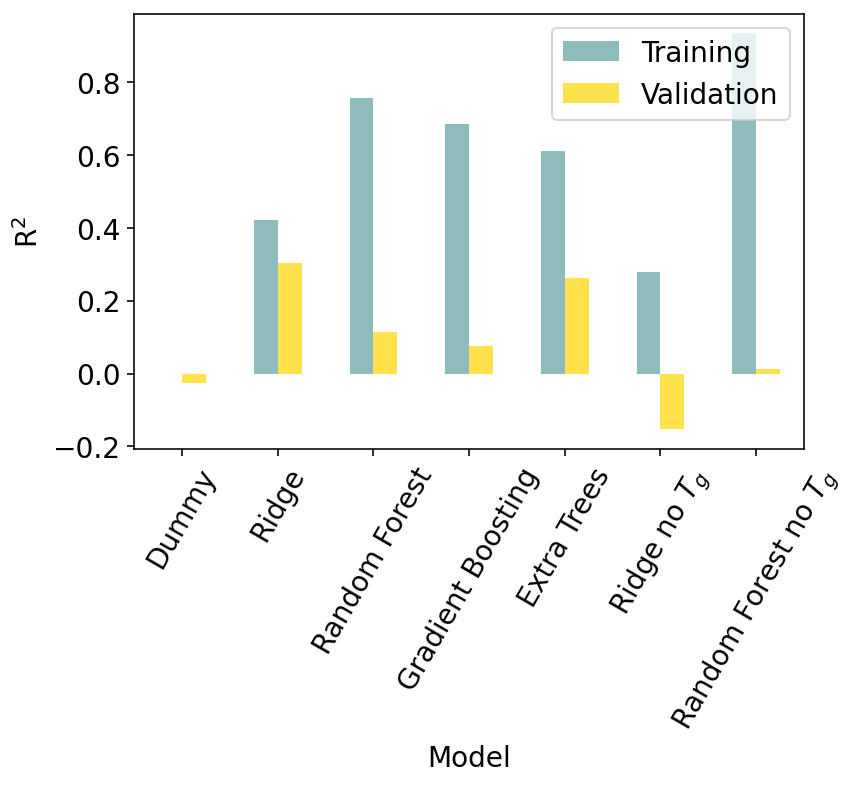

In [120]:
ax = df_metrics_sp.plot('Model',['r2_train','r2_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('R$^2$')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Dummy','Ridge','Random Forest','Gradient Boosting','Extra Trees','Ridge no $T_g$','Random Forest no $T_g$'])

In [121]:
df_metrics_sp_ridge_rf = df_metrics_sp.drop([0,3,4],axis=0)
df_metrics_sp_ridge_rf = df_metrics_sp_ridge_rf.reindex([1,5,2,6])
df_metrics_sp_ridge_rf

,Model,model_params,rMSE_train,MAE_train,r2_train,rMSE_val,MAE_val,r2_val,Features,Feature importance
1,ridge,"Ridge(alpha=1, copy_X=True, fit_intercept=True...",0.864798,0.621607,0.422209,0.928856,0.695259,0.302373,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.18547861106821328, -0.8581758084168912, -1...."
5,ridge,"Ridge(alpha=10, copy_X=True, fit_intercept=Tru...",0.966778,0.797536,0.278048,1.215235,1.018459,-0.151741,"Index(['Comonomer percentage', 'Comonomer2 ETA...","[0.22975879203027852, -0.13236648774847565, -0..."
2,randomforestregressor,"(DecisionTreeRegressor(criterion='mse', max_de...",0.560482,0.422816,0.756030,1.035208,0.775610,0.114143,"Index(['Comonomer2 AETA_eta_F', 'approxMW(kDa)...","[0.1732035240978536, 0.23401968534479273, 0.59..."
6,randomforestregressor,"(DecisionTreeRegressor(criterion='mse', max_de...",0.291461,0.177174,0.933972,1.113951,0.916977,0.012670,"Index(['Comonomer percentage', 'Comonomer2 ETA...","[0.015058639868631169, 0.0020403964823232975, ..."


[Text(0, 0, 'Ridge'),
 Text(0, 0, 'Ridge no MW,$T_g$'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Random Forest no MW,$T_g$')]

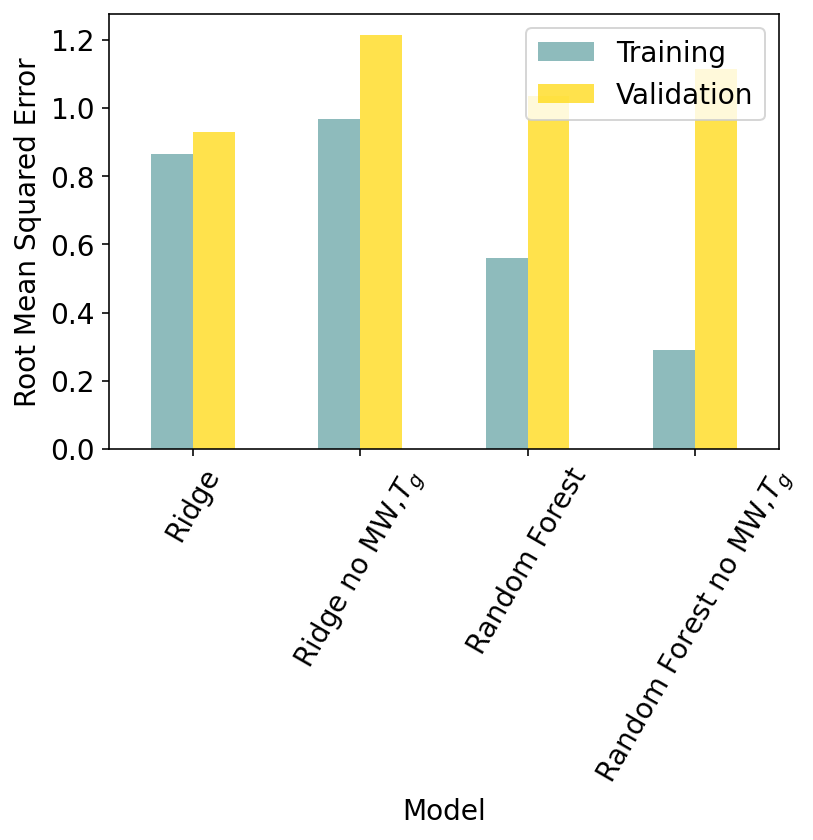

In [122]:
ax = df_metrics_sp_ridge_rf.plot('Model',['rMSE_train','rMSE_val'],kind='bar',fontsize=14,rot=60,colors = ['cadetblue','gold'],alpha=0.7)
ax.set_ylabel('Root Mean Squared Error')
ax.legend(['Training', 'Validation'])
ax.set_xticklabels(['Ridge','Ridge no MW,$T_g$','Random Forest','Random Forest no MW,$T_g$'])

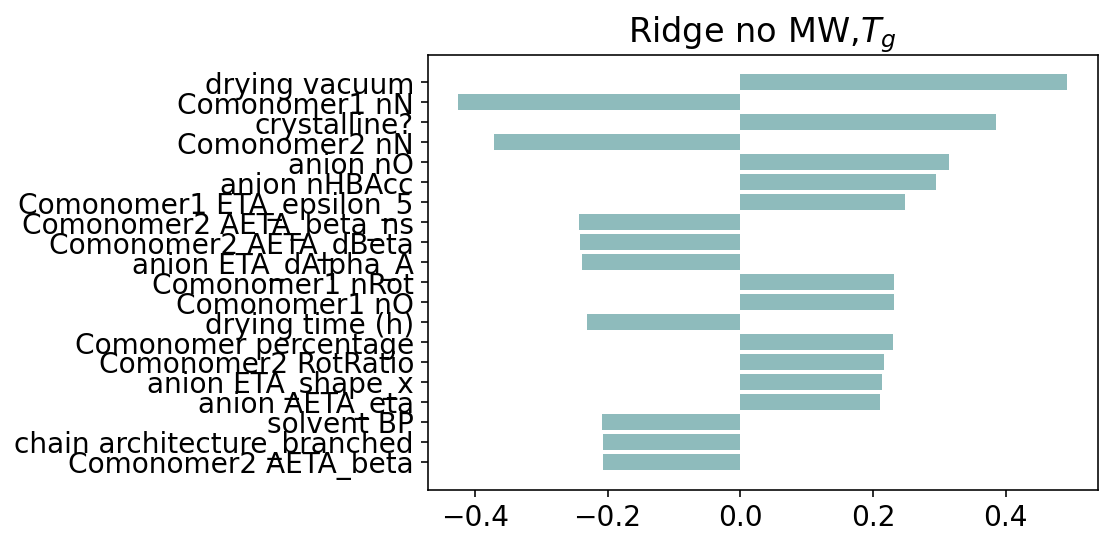

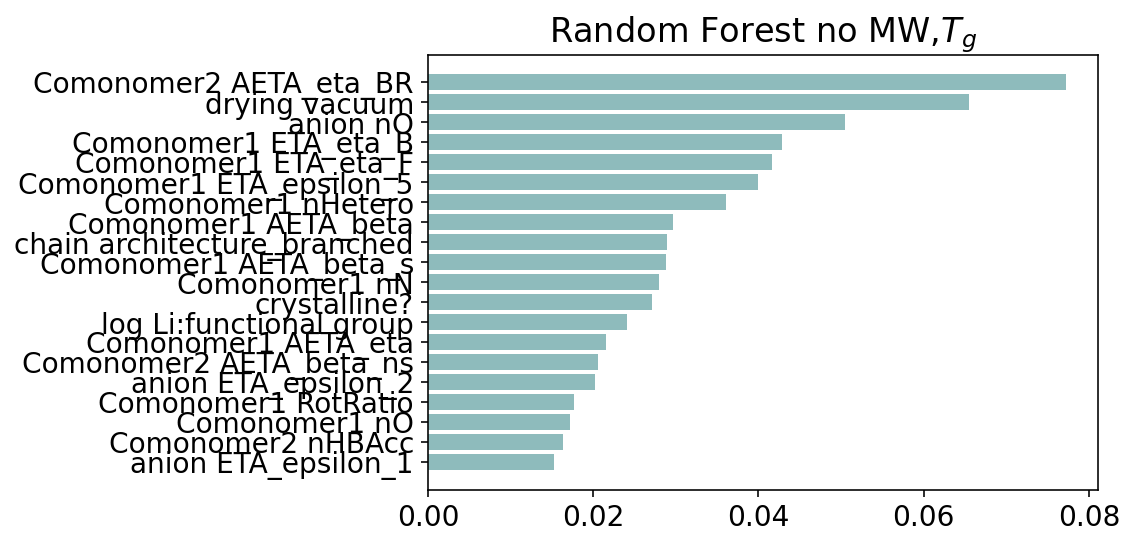

In [124]:
model = ['Dummy','(a) Ridge','(b) Random Forest','(c) Gradient Boosting','(d) Extra Trees','Ridge no MW,$T_g$','Random Forest no MW,$T_g$']

for index in [5,6]: #,5
    Descriptors = pd.DataFrame()
    Descriptors['descriptor'] = df_metrics_sp['Features'][index]
    Descriptors['coefficient'] = df_metrics_sp['Feature importance'][index]
    Descriptors['abs_coeff'] = [abs(n) for n in Descriptors['coefficient']]
    ordered_importance = Descriptors.sort_values(by = ['abs_coeff'],ascending = False)
    plt.figure()
    ax=plt.axes()
    ax.barh(ordered_importance['descriptor'][0:20],ordered_importance['coefficient'][0:20],color = 'cadetblue',alpha=0.7)
    ax.invert_yaxis()
    plt.title(model[index])
    plt.show()

## Test RF on test data and plot


In [61]:
print('train accuracy: ', rf_best_rfe.score(X_train_RFE,y_train))
print('test accuracy: ', rf_best_rfe.score(X_test_RFE,y_test))

train accuracy:  0.7162139687663905
test accuracy:  0.6490678319523233


In [62]:
rf_test = rf_best_rfe.predict(X_test_RFE)

Plotting code adapted from: https://github.com/anthony-wang/BestPractices/blob/master/notebooks/3-modeling_classic_models.ipynb

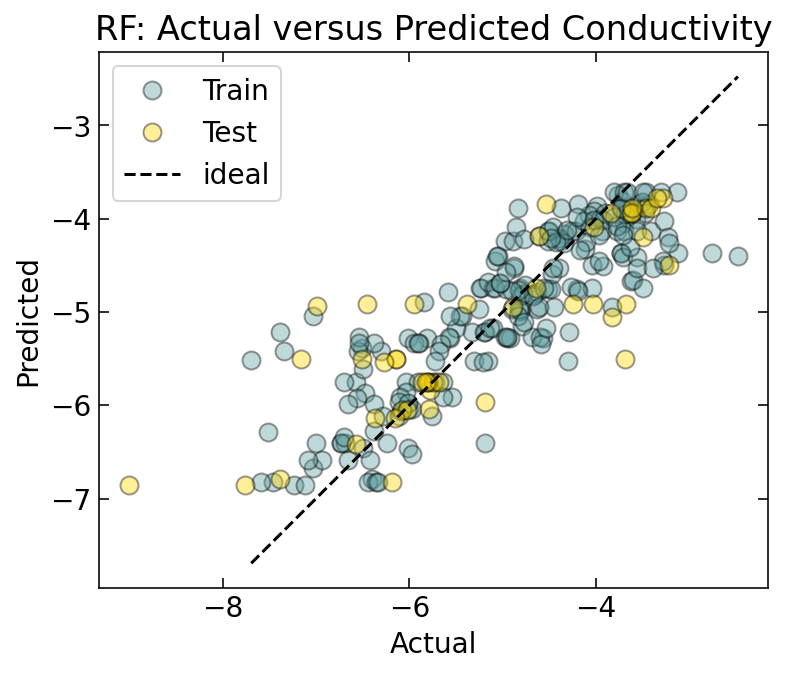

In [63]:


y_actual = y_test['logCond60']
y_predicted = rf_test

y_actual_train = y_train['logCond60']
y_predicted_train = rf_best_rfe.predict(X_train_RFE)

plt.figure(figsize=(6,6))
plt.plot(y_actual_train, y_predicted_train,  'o', ms=9, mec='k', mfc='cadetblue', alpha=0.4,label='Train')
plt.plot(y_actual, y_predicted,  'o', ms=9, mec='k', mfc='gold', alpha=0.4,label='Test') #marker='o', mfc='none', color='#0077be', linestyle='none'
plt.plot([min([min(y_actual_train), min(y_predicted_train)]), max([max(y_actual_train), max(y_predicted_train)])], [min([min(y_actual_train), min(y_predicted_train)]), max([max(y_actual_train), max(y_predicted_train)])], 'k--', label='ideal')
plt.title("RF: Actual versus Predicted Conductivity")
plt.axis('scaled')
plt.tick_params(direction='in', length=5, bottom=True, top=True, left=True, right=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(loc='upper left')
plt.show()

In [64]:
r2 = r2_score(y_actual, y_predicted)
mae = mean_absolute_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'mse: {mse:0.4f}')
print(f'rmse: {np.sqrt(mse):0.4f}')

r2: 0.6491
mae: 0.6066
mse: 0.6825
rmse: 0.8261
